In [2]:
# !pip install plotly

In [3]:
#for exploring dataframe
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

#for animated graphs
import plotly.express as px
import plotly.graph_objects as go

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries for machine learning
from sklearn.linear_model import LogisticRegression as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [6]:
df = pd.read_csv('Crop_recommendation.csv')

In [7]:
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [8]:
df.shape

(2200, 8)

In [9]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

<Axes: >

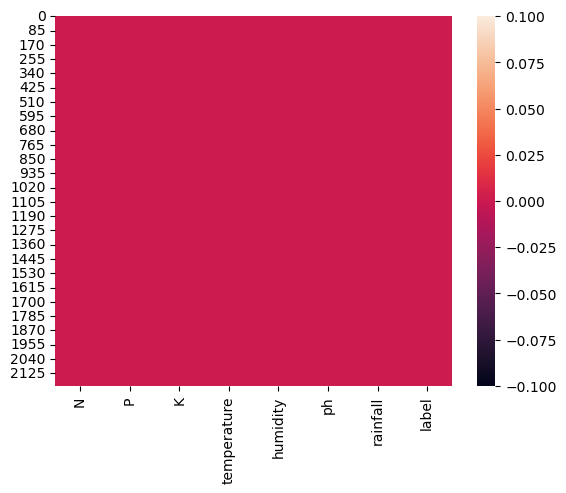

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Data Cleaning

In [14]:
df.P = df.P.fillna(value = 0)
df.K = df.K.fillna(value = 0)

In [15]:
df.temperature = df.temperature.fillna(value = df.temperature.mean())
df.humidity = df.humidity.fillna(value = df.humidity.mean())
df.ph = df.ph.fillna(value = df.ph.mean())
df.rainfall = df.rainfall.fillna(value = df.rainfall.mean())

In [16]:
df.label = df.label.fillna(value = df.label.mode()[0])

In [17]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Exploratory Data Analysis

### Statistical Study

In [19]:
@interact
def summary(crops= list(df['label'].value_counts().index)):
    x = df[df['label']==crops]
    print("____________________________________________________")
    print("Statistics for Nitrogen")
    print('Minimum Nitrogen Required: ',x['N'].min())
    print('Average Nitrogen Required: ',x['N'].mean())
    print('Maximum Nitrogen Required: ',x['N'].max())
    
    
    print("____________________________________________________")
    print("Statistics for Phosphrus")
    print('Minimum Phosphorus Required: ',x['P'].min())
    print('Average Phosphorus Required: ',x['P'].mean())
    print('Maximum Phosphorus Required: ',x['P'].max())

    print("____________________________________________________")
    print("Statistics for Pottasium")
    print('Minimum Pottasium Required: ',x['K'].min())
    print('Average Pottasium Required: ',x['K'].mean())
    print('Maximum Pottaisum Required: ',x['K'].max())

    print("____________________________________________________")
    print("Statistics for Temperature")
    print('Minimum Temperature Required: {:.2f}'.format(x['temperature'].min()))
    print('Average Temperature Required: {:.2f}'.format(x['temperature'].mean()))
    print('Maximum Temperature Required: {:.2f}'.format(x['temperature'].max()))
    
    
    print("____________________________________________________")
    print("Statistics for Humidity")
    print('Minimum Humidity Required: {:.2f}'.format(x['humidity'].min()))
    print('Average Humidity Required: {:.2f}'.format(x['humidity'].mean()))
    print('Maximum Humidity Required: {:.2f}'.format(x['humidity'].max()))
    
    print("____________________________________________________")
    print("Statistics for ph")
    print('Minimum ph Required: {:.2f}'.format(x['ph'].min()))
    print('Average ph Required: {:.2f}'.format(x['ph'].mean()))
    print('Maximum ph Required: {:.2f}'.format(x['ph'].max()))
    
    
    print("____________________________________________________")
    print("Statistics for Rainfall")
    print('Minimum Rainfall Required: {:.2f} '.format(x['rainfall'].min()))
    print('Average Rainfall Required: {:.2f}'.format(x['rainfall'].mean()))
    print('Maximum Rainfall Required: {:.2f}'.format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [20]:
@interact
def compare(condition=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average value for: {:.2f}".format(df[condition].mean()))
    print("-----------------------------------------------------")
    print("Rice: {0:.2f}".format(df[(df['label']=='rice')][condition].mean()))
    print("Black Grams: {0:.2f}".format(df[(df['label']=='blackgram')][condition].mean()))
    print("Banana: {0:.2f}".format(df[(df['label']=='banana')][condition].mean()))
    print("Jute: {0:.2f}".format(df[(df['label']=='jute')][condition].mean()))

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [21]:
@interact 
def compare(condition=['N','P','K','temperature','ph','humidity','rainfall']):
    print(f"Crops which require greater {condition} than than average",'\n')
    print(df[df[condition] > df[condition].mean()]['label'].unique())
    print("------------------------------------------------")
    print(f"Crops which require lesser {condition} than than average",'\n')
    print(df[df[condition] <= df[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [22]:
print("Some interesting patterns")
print("----------------------------")
print("Crops which require very high ratio of Nitrogen Content in soil: ",df[df['N']>120]['label'].unique())
print("Crops which require very high ratio of Phosphorus Content in soil: ",df[df['P']>100]['label'].unique())
print("Crops which require very high ratio of Pottasium Content in soil: ",df[df['K']>200]['label'].unique())
print("Crops which require very high Rainfall: ",df[df['rainfall']>200]['label'].unique())
print("Crops which require very Low Temperature: ",df[df['temperature']<10]['label'].unique())
print("Crops which require very High Temperature: ",df[df['temperature']>40]['label'].unique())
print("Crops which require very Low Humidity: ",df[df['humidity']<20]['label'].unique())
print("Crops which require very High pH value ",df[df['ph']>9]['label'].unique())
print("Crops which require very Low pH value: ",df[df['ph']<4]['label'].unique())

Some interesting patterns
----------------------------
Crops which require very high ratio of Nitrogen Content in soil:  ['cotton']
Crops which require very high ratio of Phosphorus Content in soil:  ['grapes' 'apple']
Crops which require very high ratio of Pottasium Content in soil:  ['grapes' 'apple']
Crops which require very high Rainfall:  ['rice' 'papaya' 'coconut']
Crops which require very Low Temperature:  ['grapes']
Crops which require very High Temperature:  ['grapes' 'papaya']
Crops which require very Low Humidity:  ['chickpea' 'kidneybeans']
Crops which require very High pH value  ['mothbeans']
Crops which require very Low pH value:  ['mothbeans']


In [23]:
print("Summer Crops")
print(df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())

print("---------------------------------------------------")
print("Winter Crops")
print(df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())

print("---------------------------------------------------")
print("Rainy Crops")
print(df[(df['rainfall']>200) & (df['humidity']>50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### Visualisation

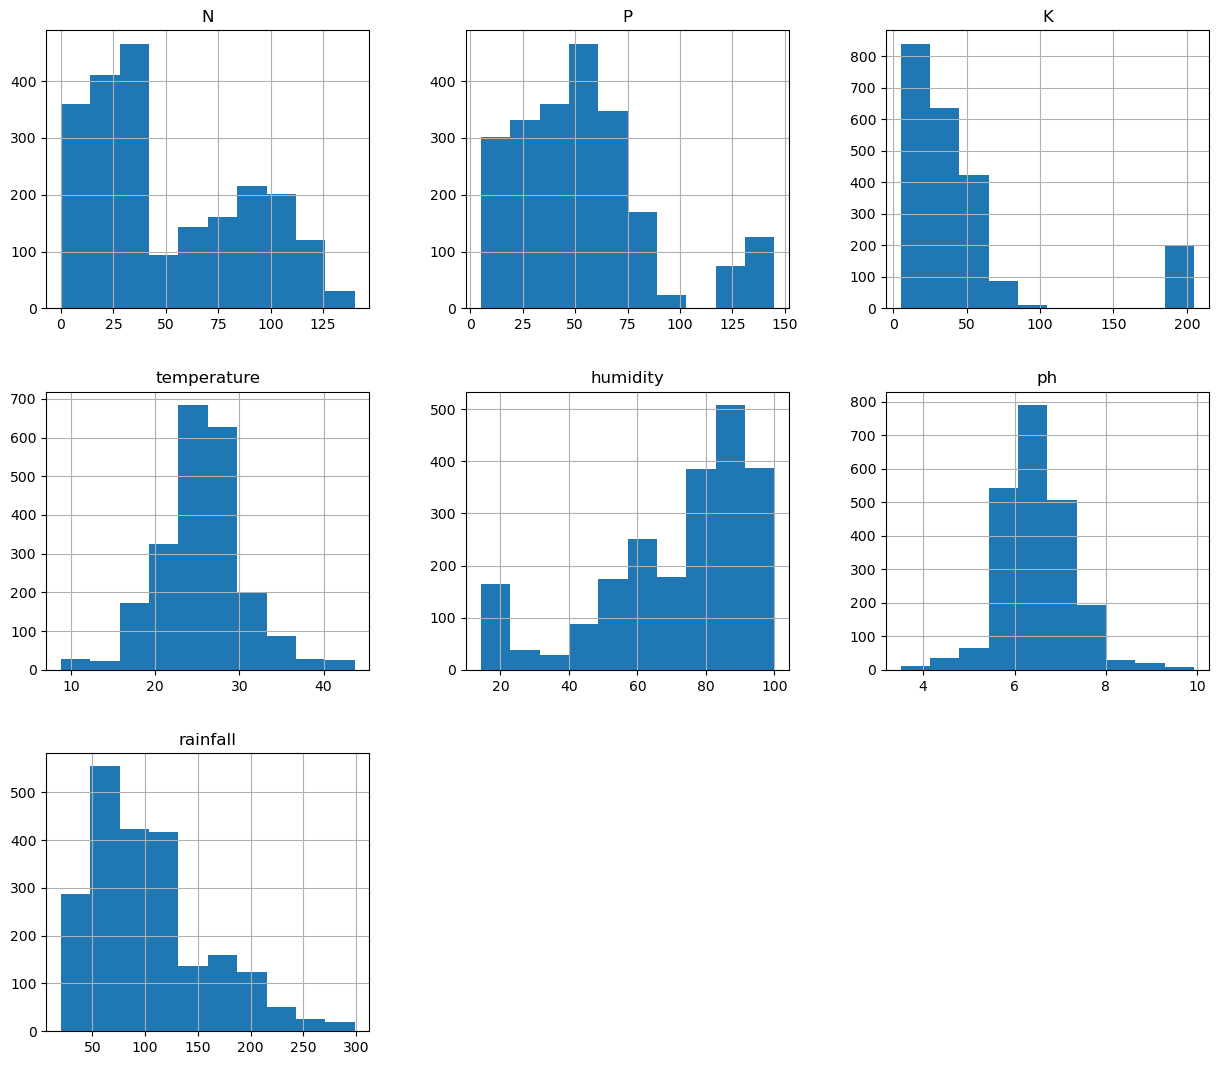

In [24]:
df.hist(bins = 10 , figsize = (15,13))
plt.show()

<Axes: >

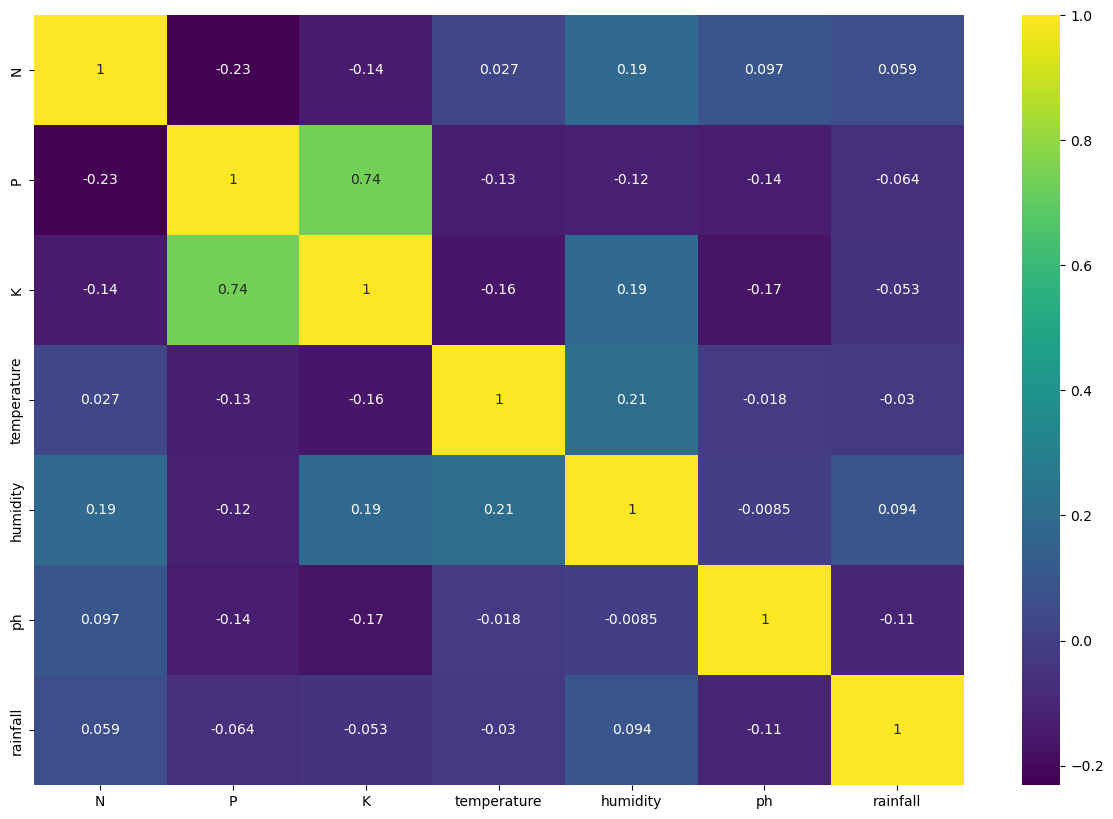

In [25]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'viridis')

<Axes: xlabel='label', ylabel='count'>

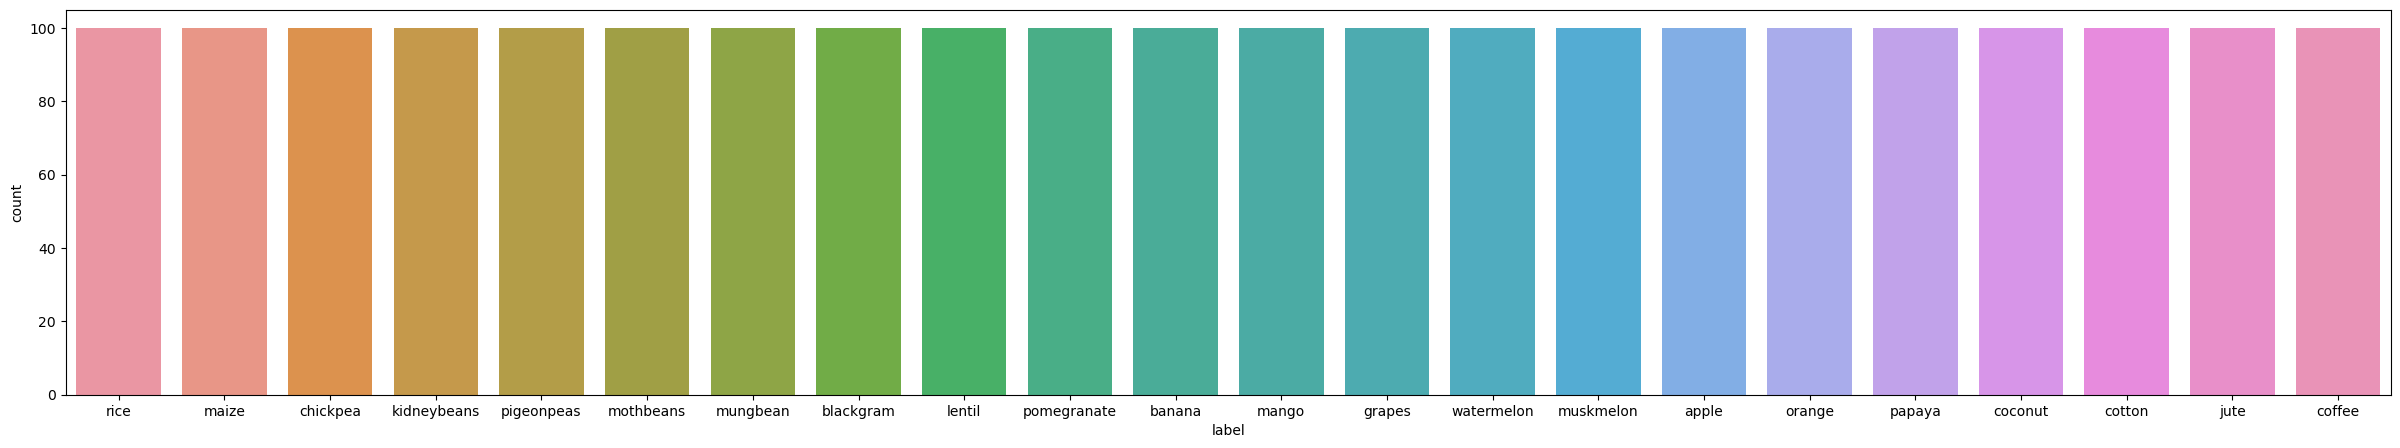

In [26]:
plt.figure(figsize = (30 , 5))
sns.countplot(data = df , x = 'label' )

<Axes: xlabel='label', ylabel='N'>

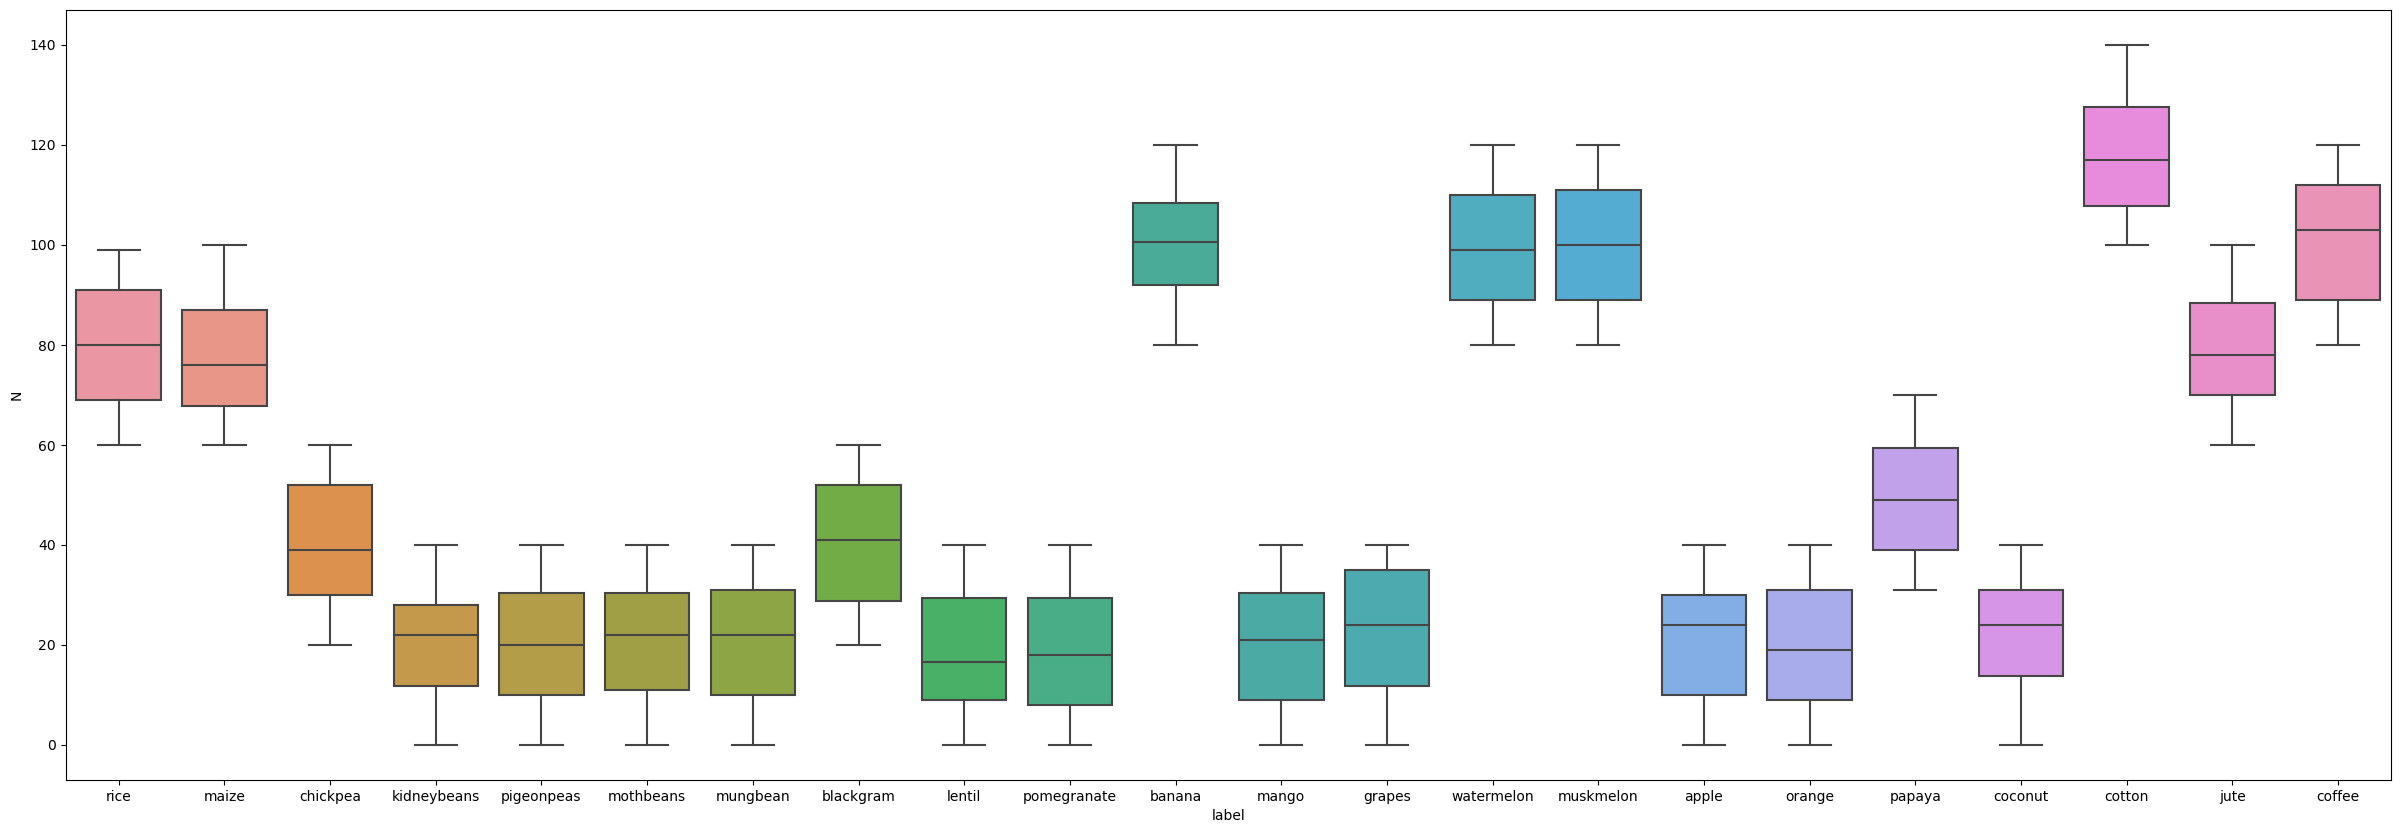

In [27]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'N')

<Axes: xlabel='label', ylabel='P'>

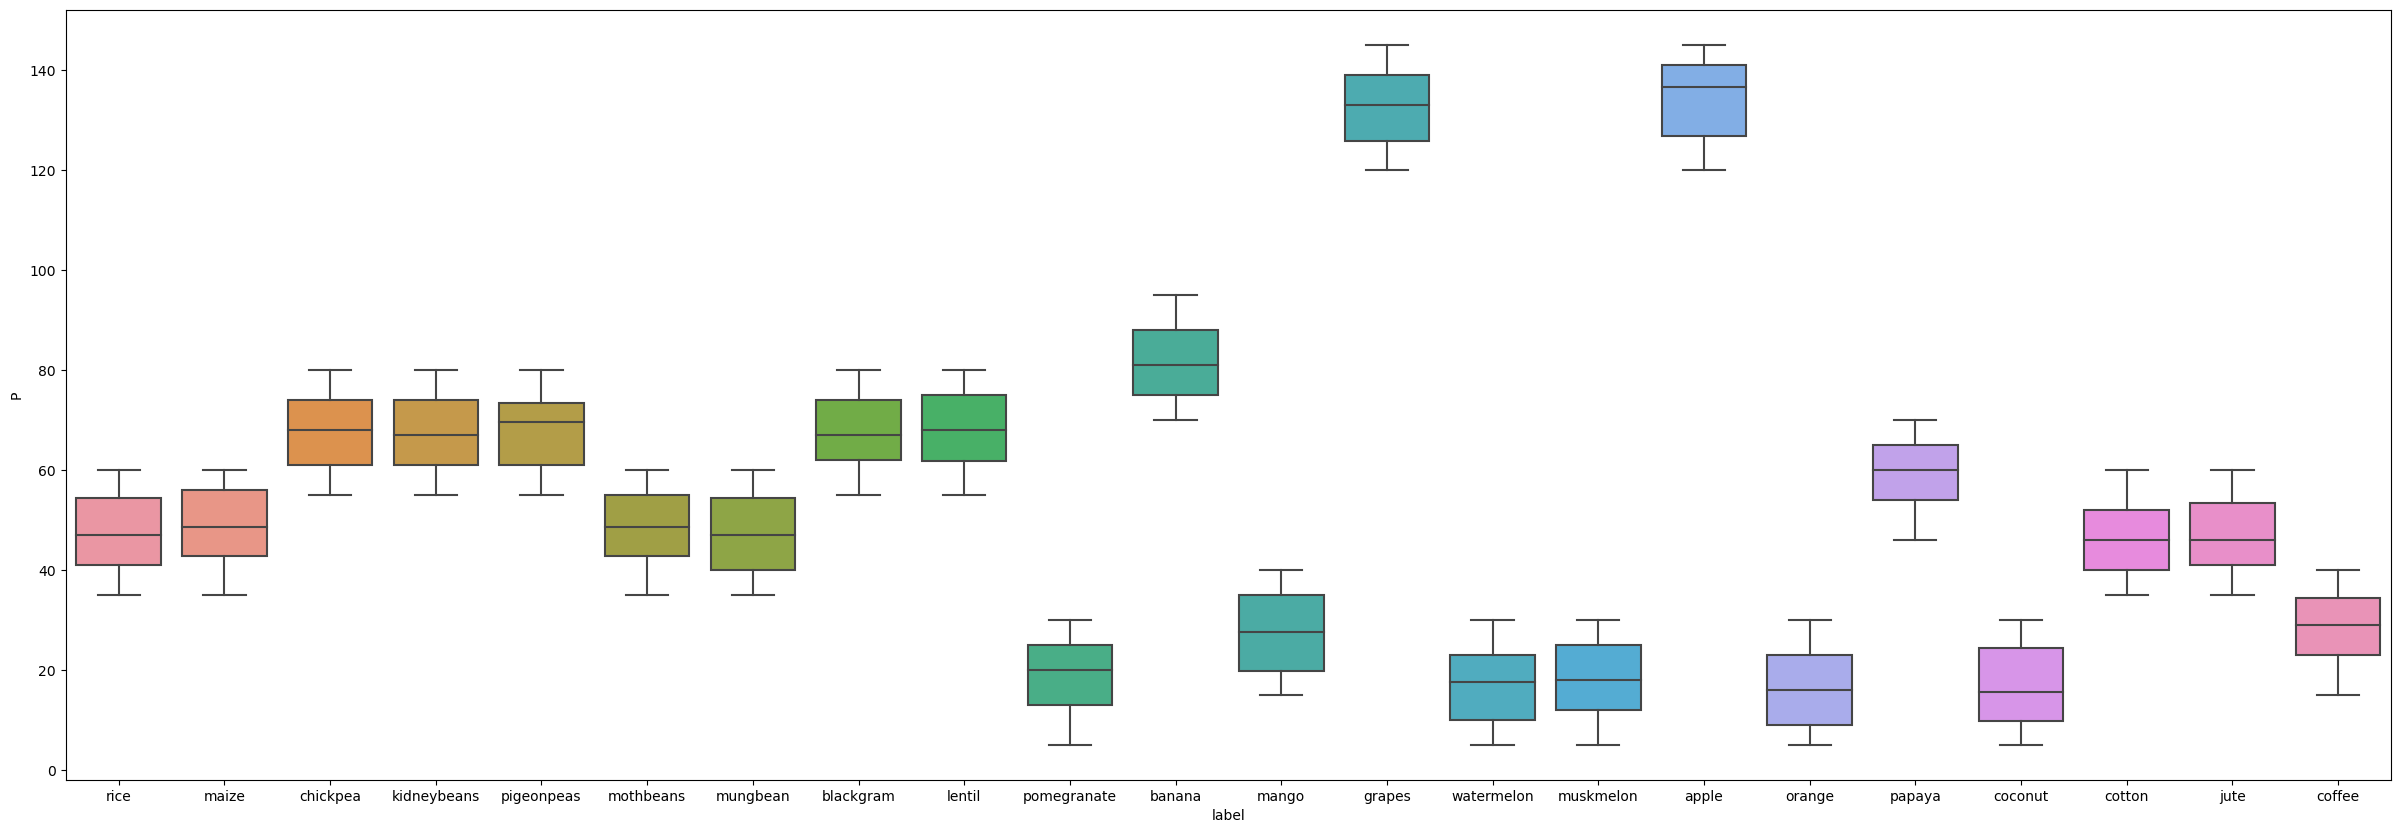

In [28]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'P')

<Axes: xlabel='label', ylabel='K'>

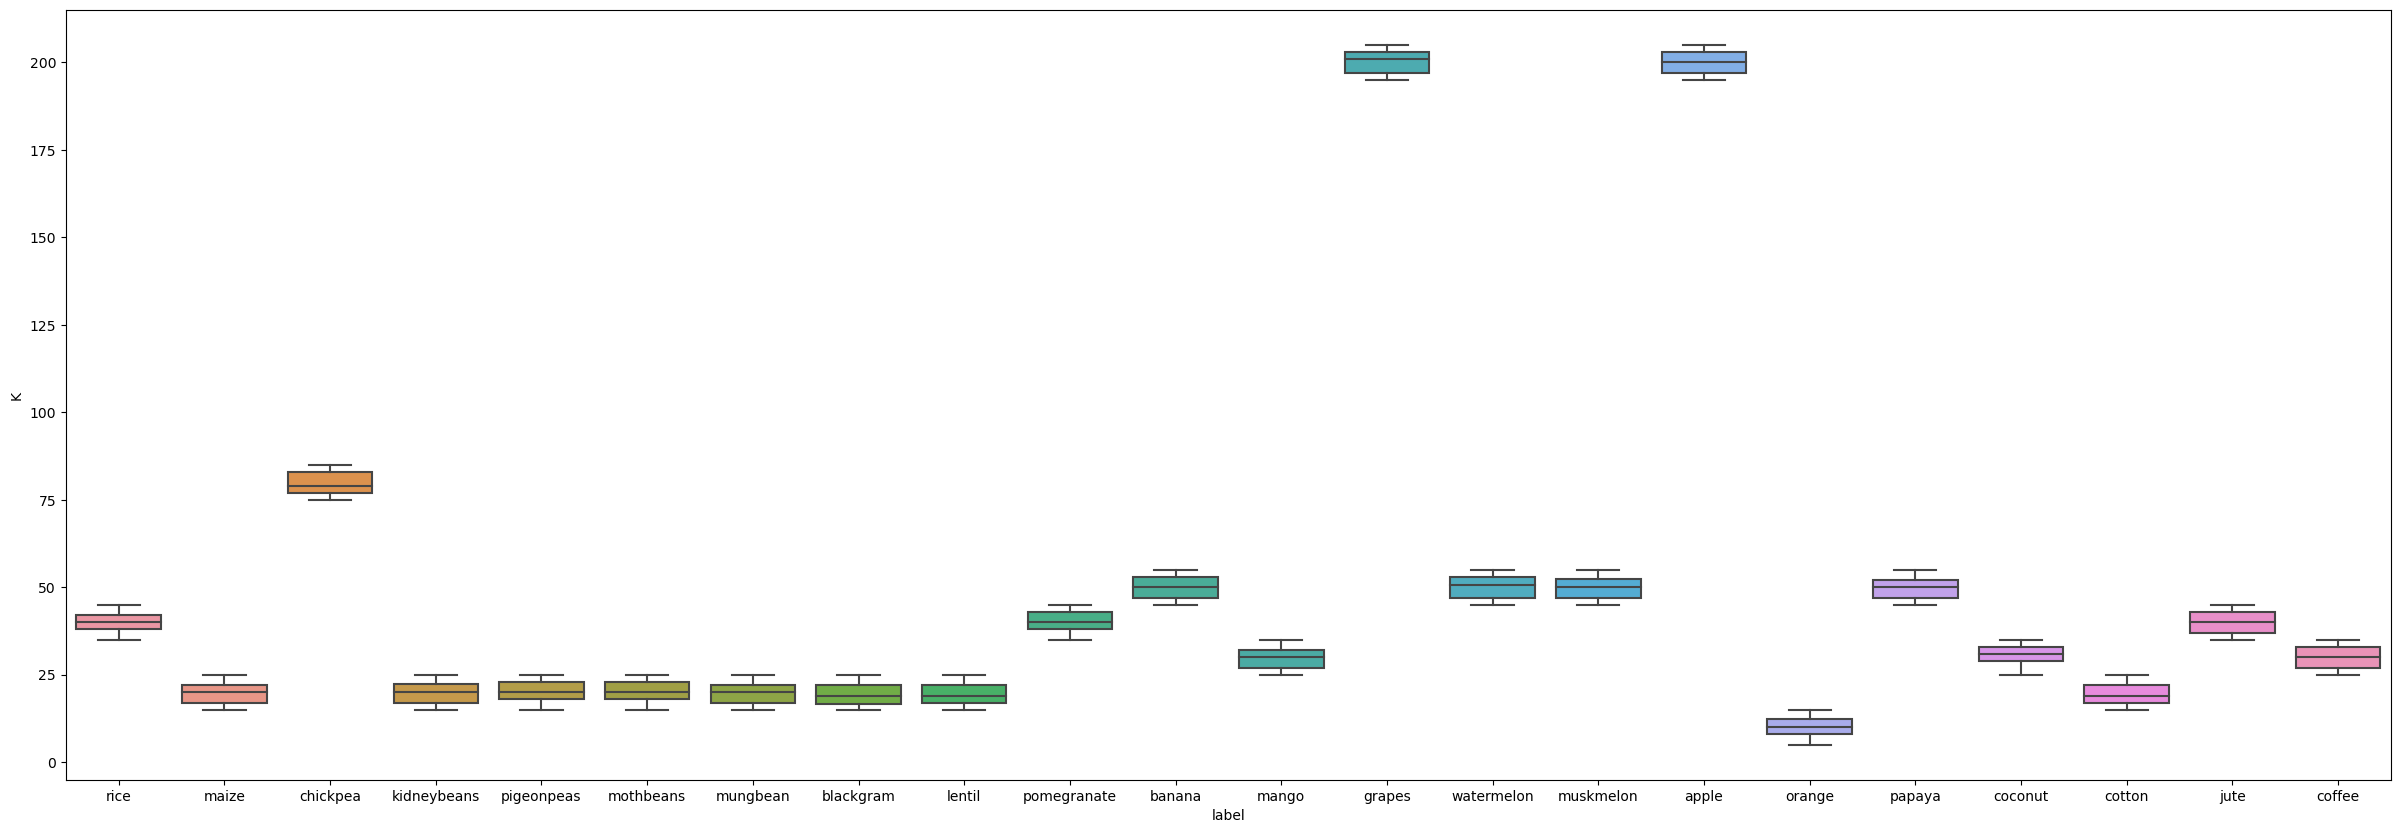

In [29]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'K')

<Axes: xlabel='label', ylabel='temperature'>

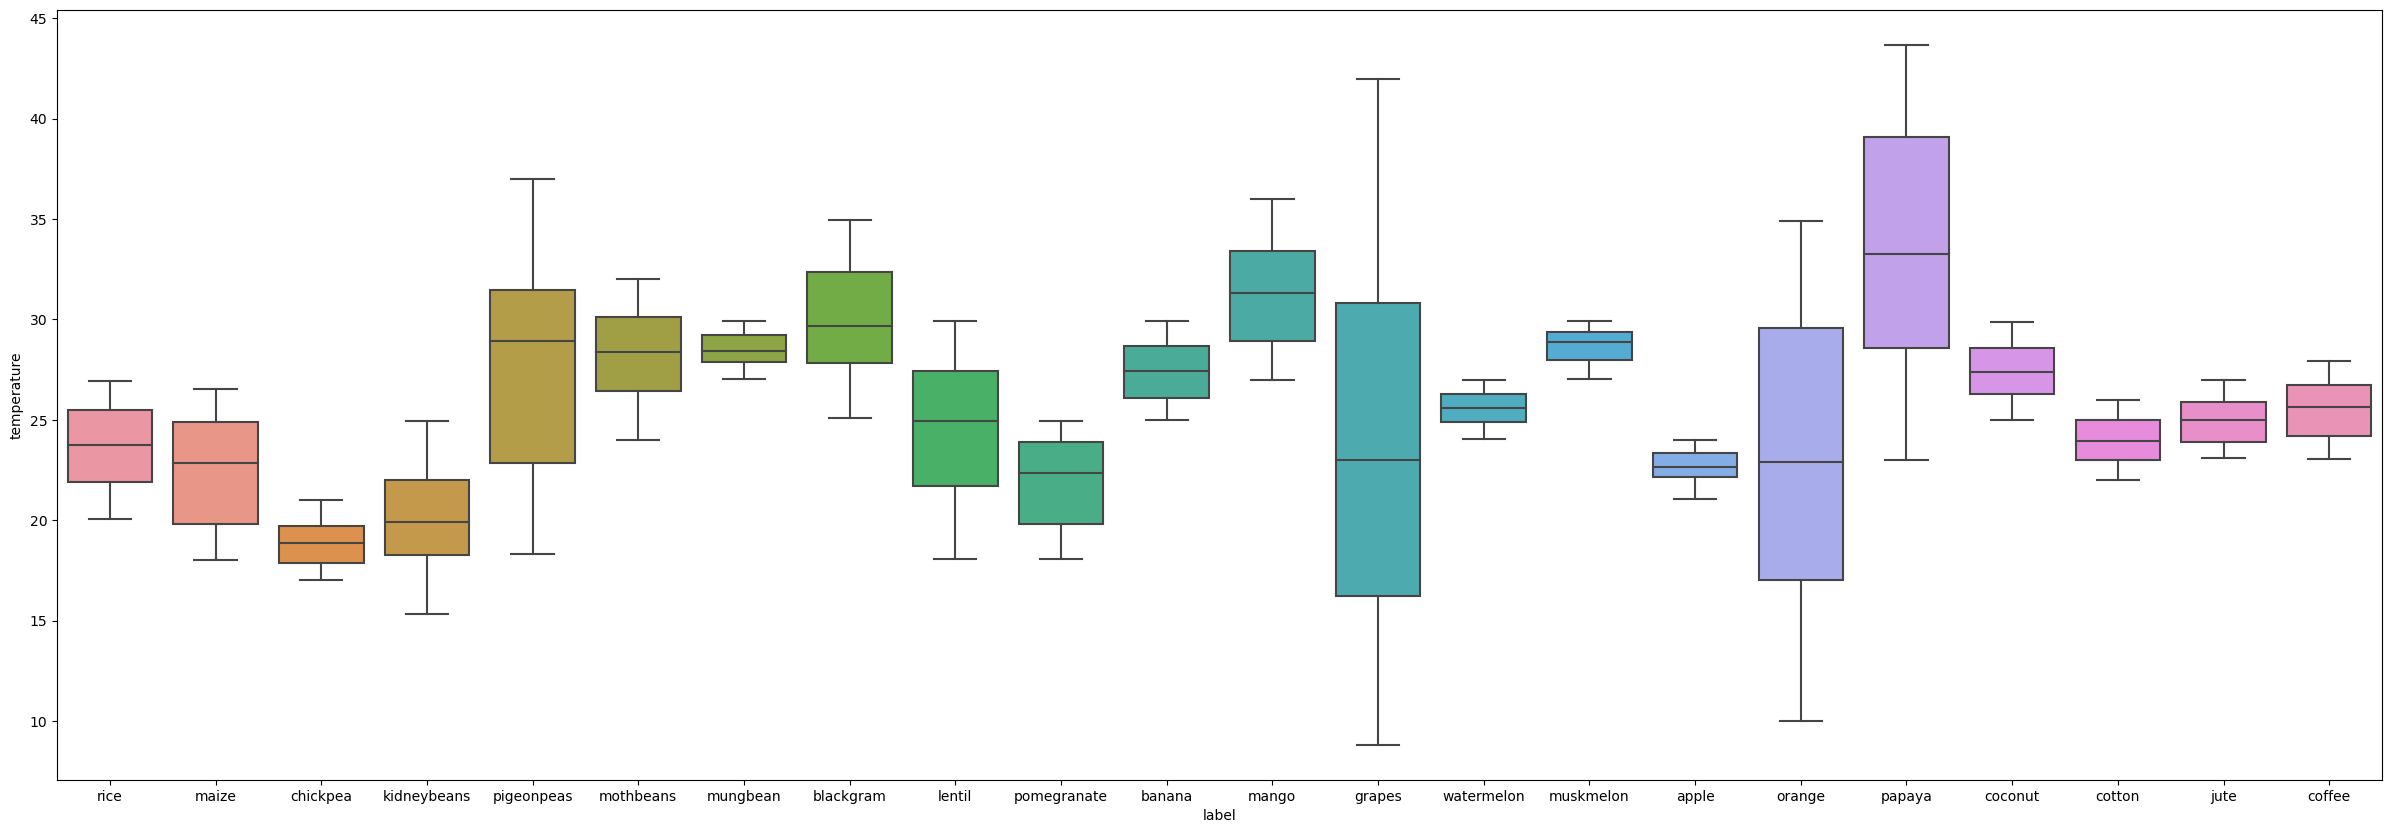

In [30]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'temperature')

<Axes: xlabel='label', ylabel='humidity'>

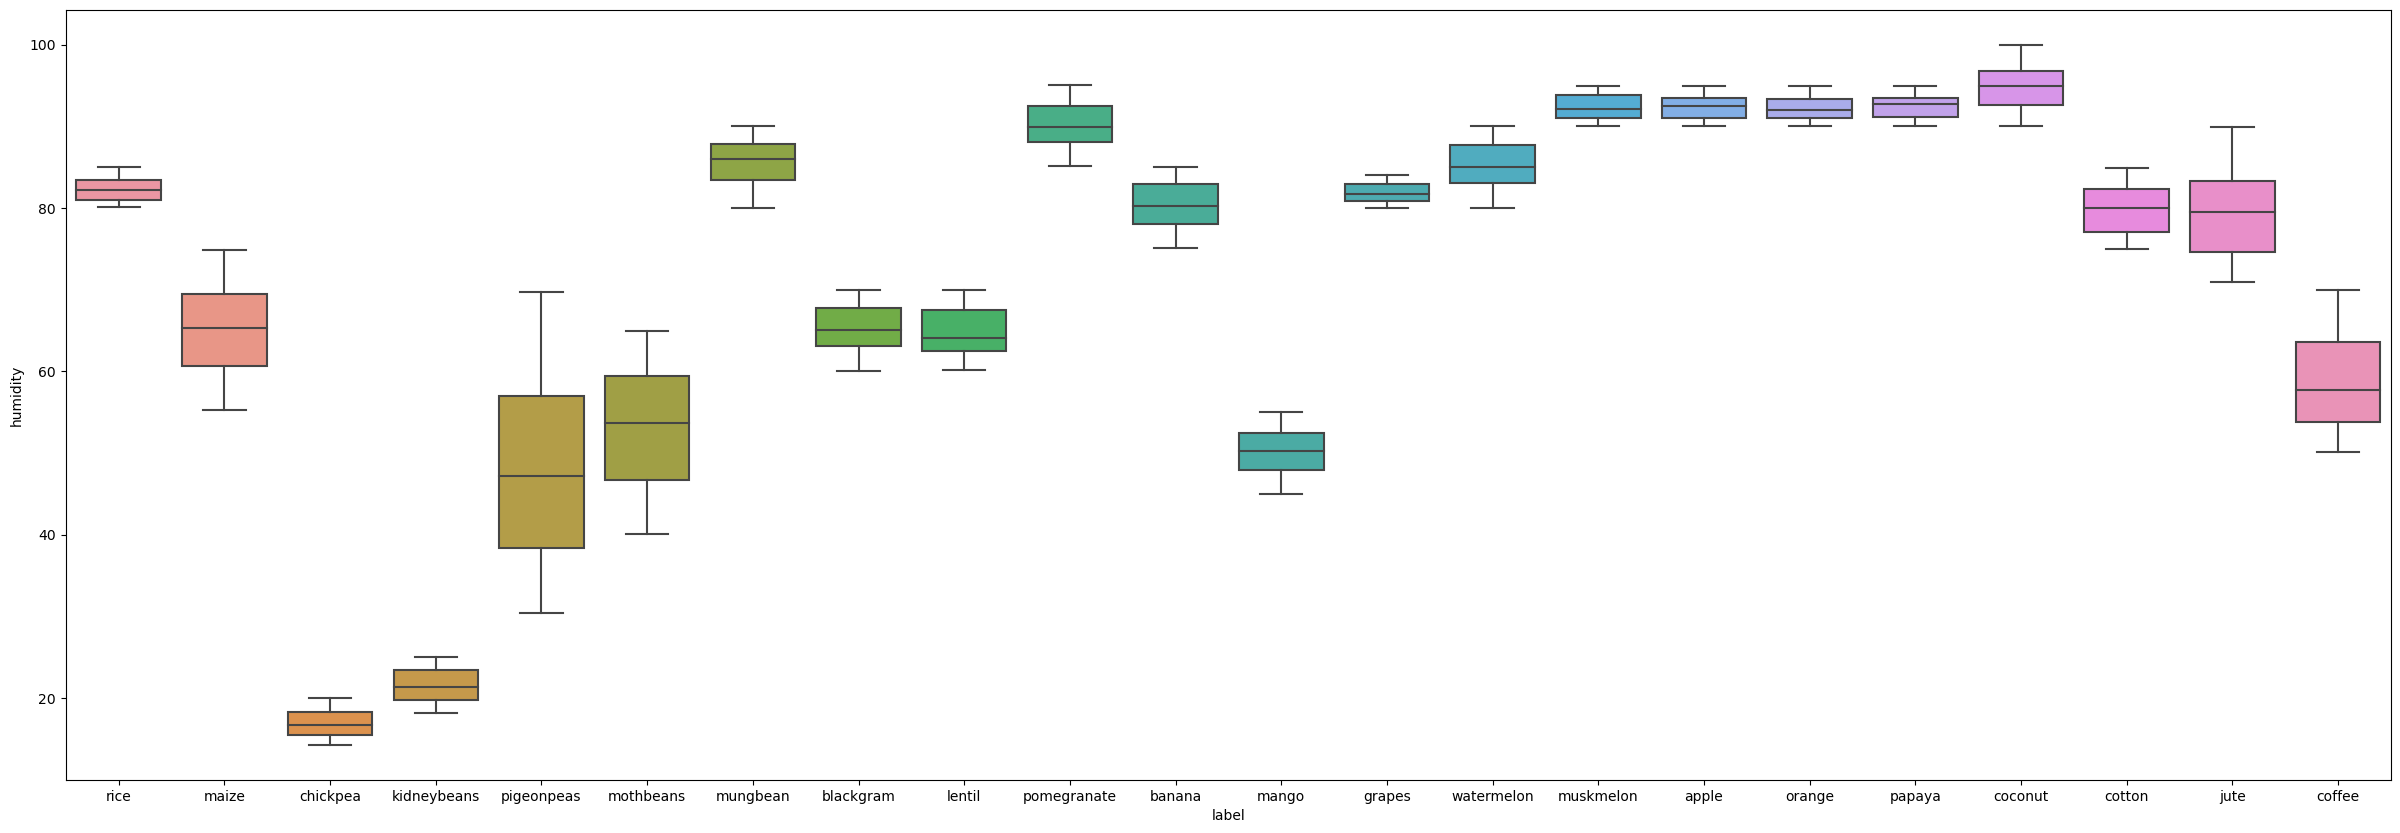

In [31]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'humidity')

<Axes: xlabel='label', ylabel='ph'>

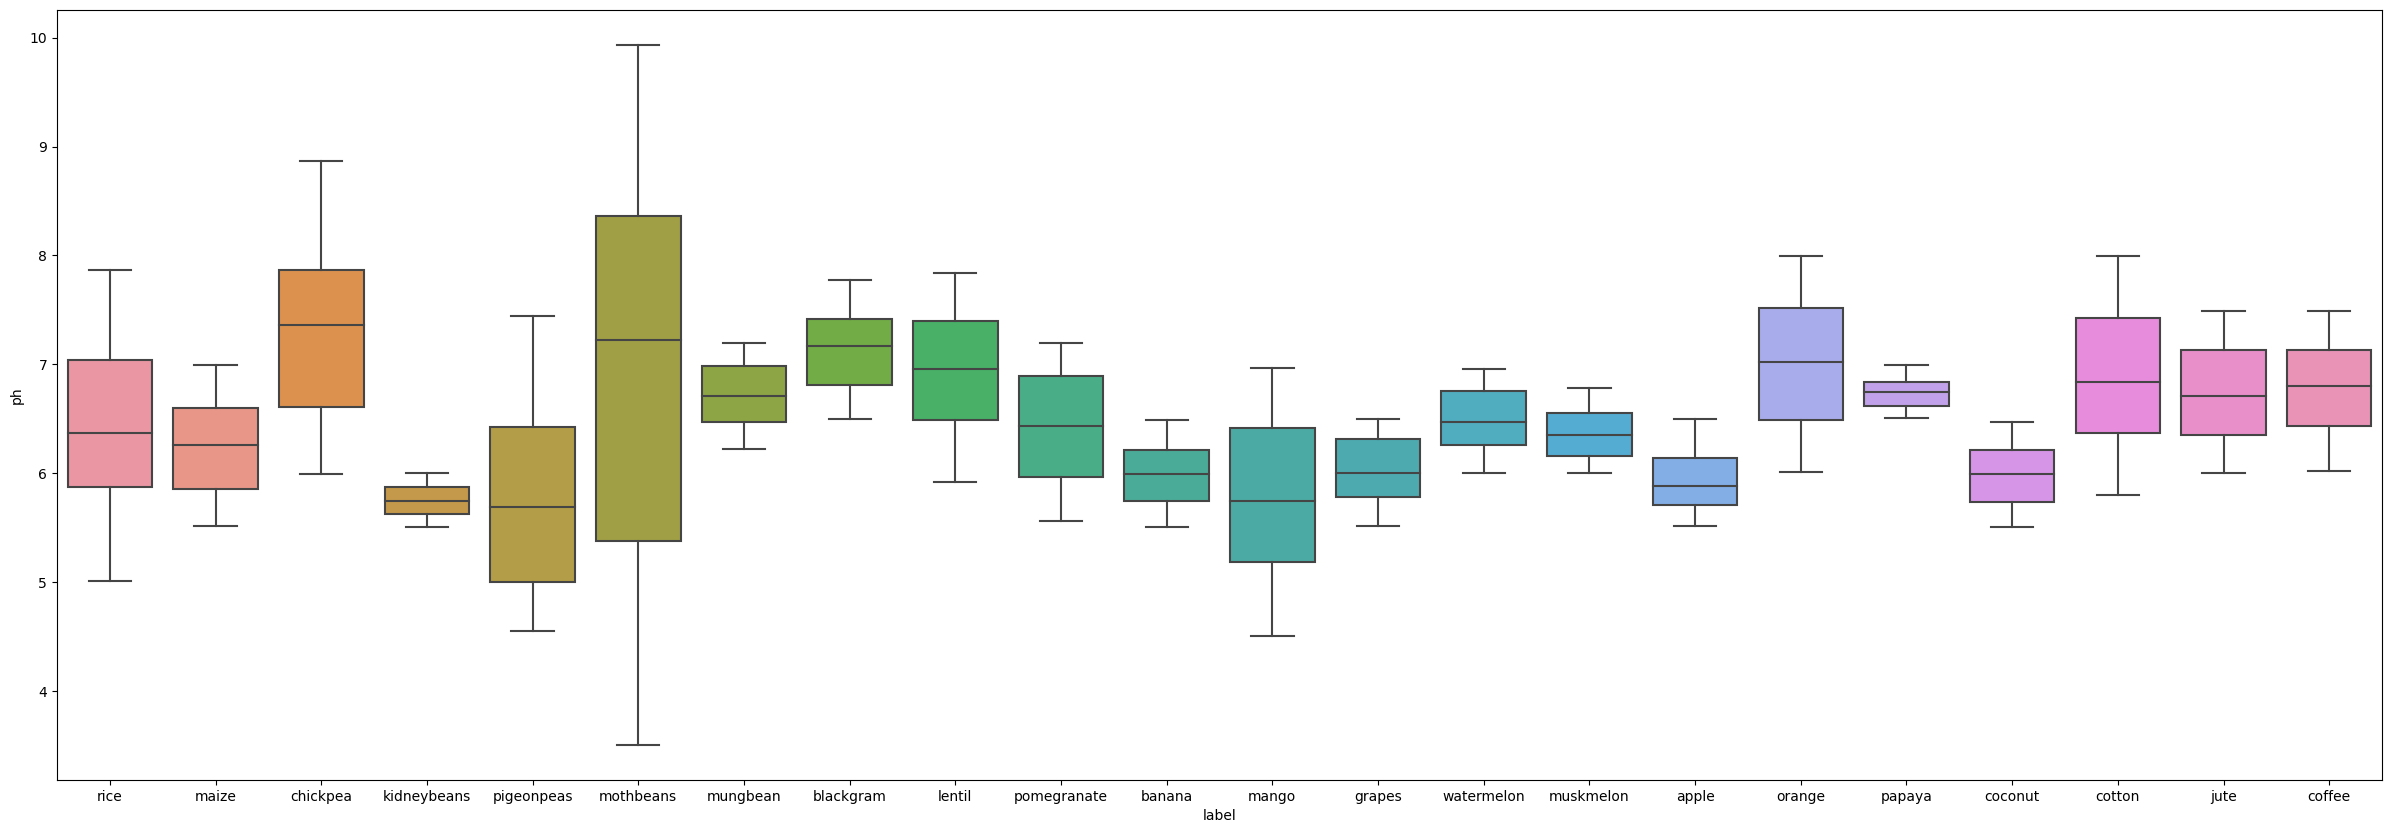

In [32]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'ph')

<Axes: xlabel='label', ylabel='rainfall'>

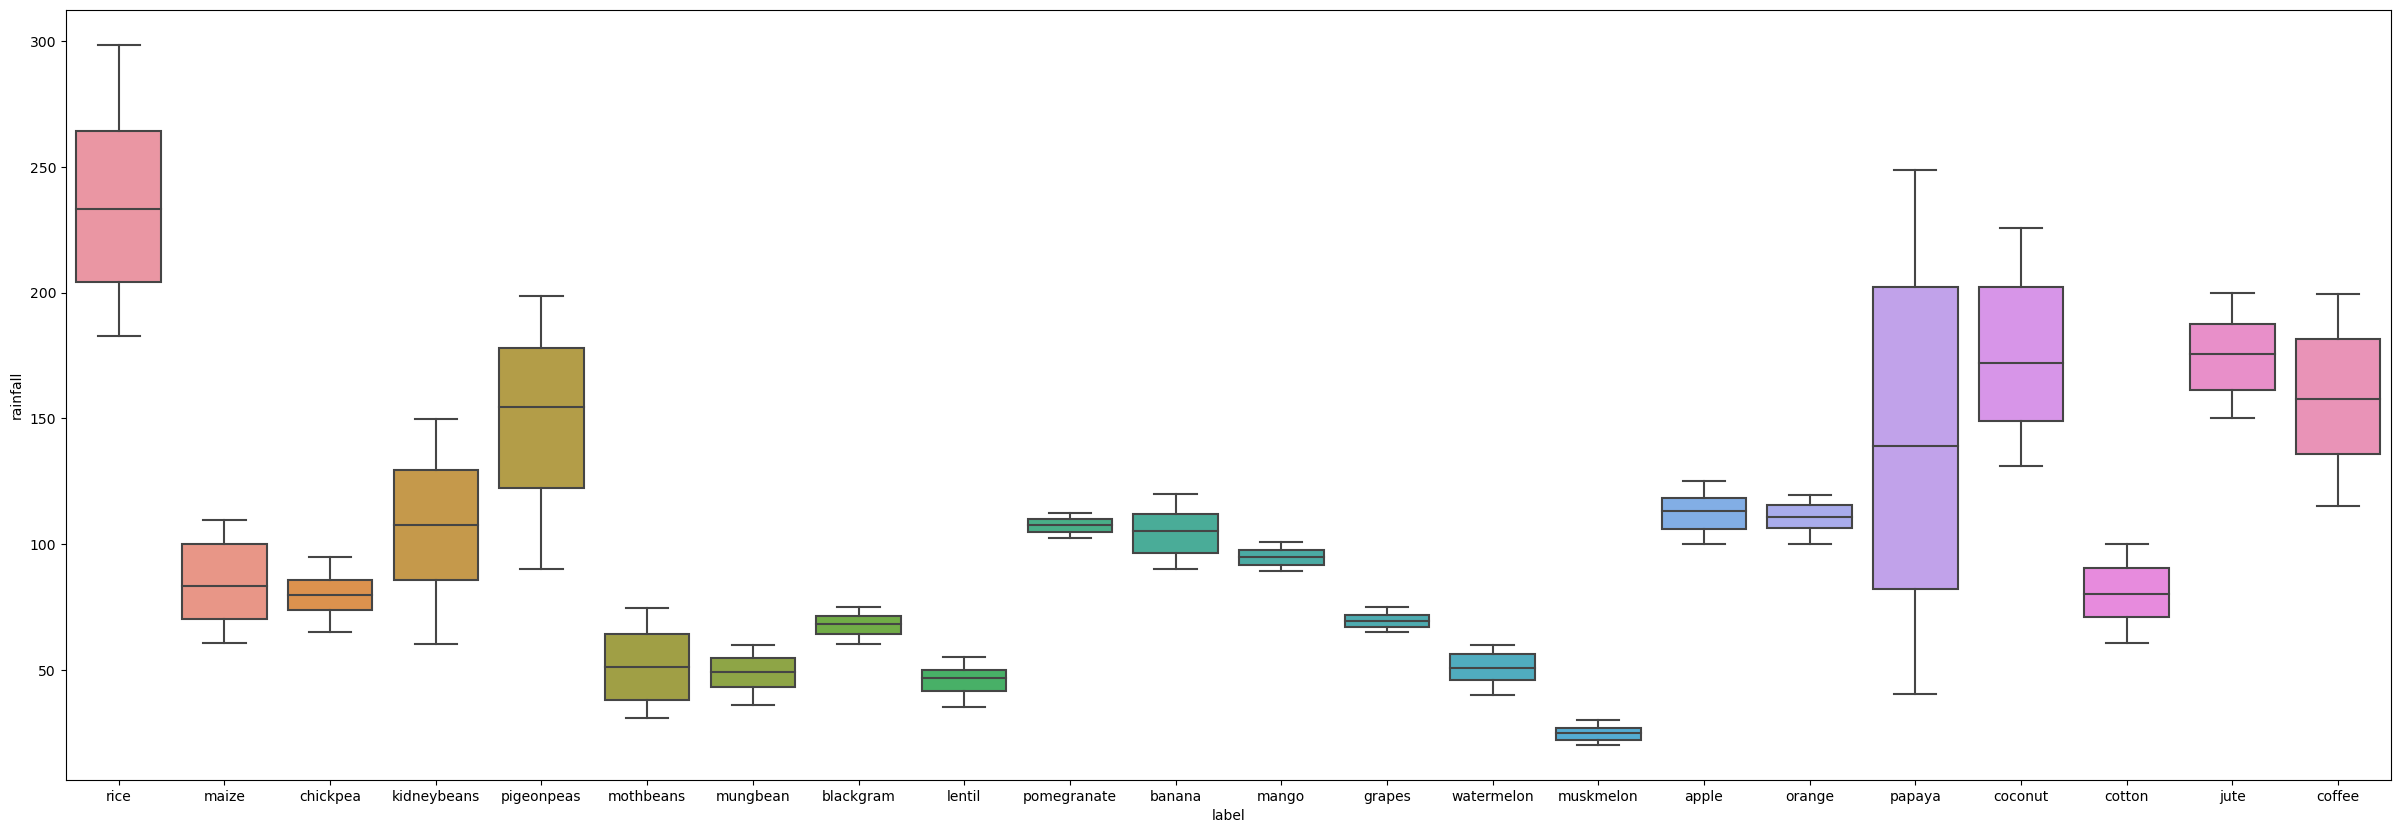

In [33]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'rainfall')

In [34]:
fig = px.histogram(df , x ='N', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='P', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='K', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='temperature', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='humidity', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='ph', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='rainfall', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()                  

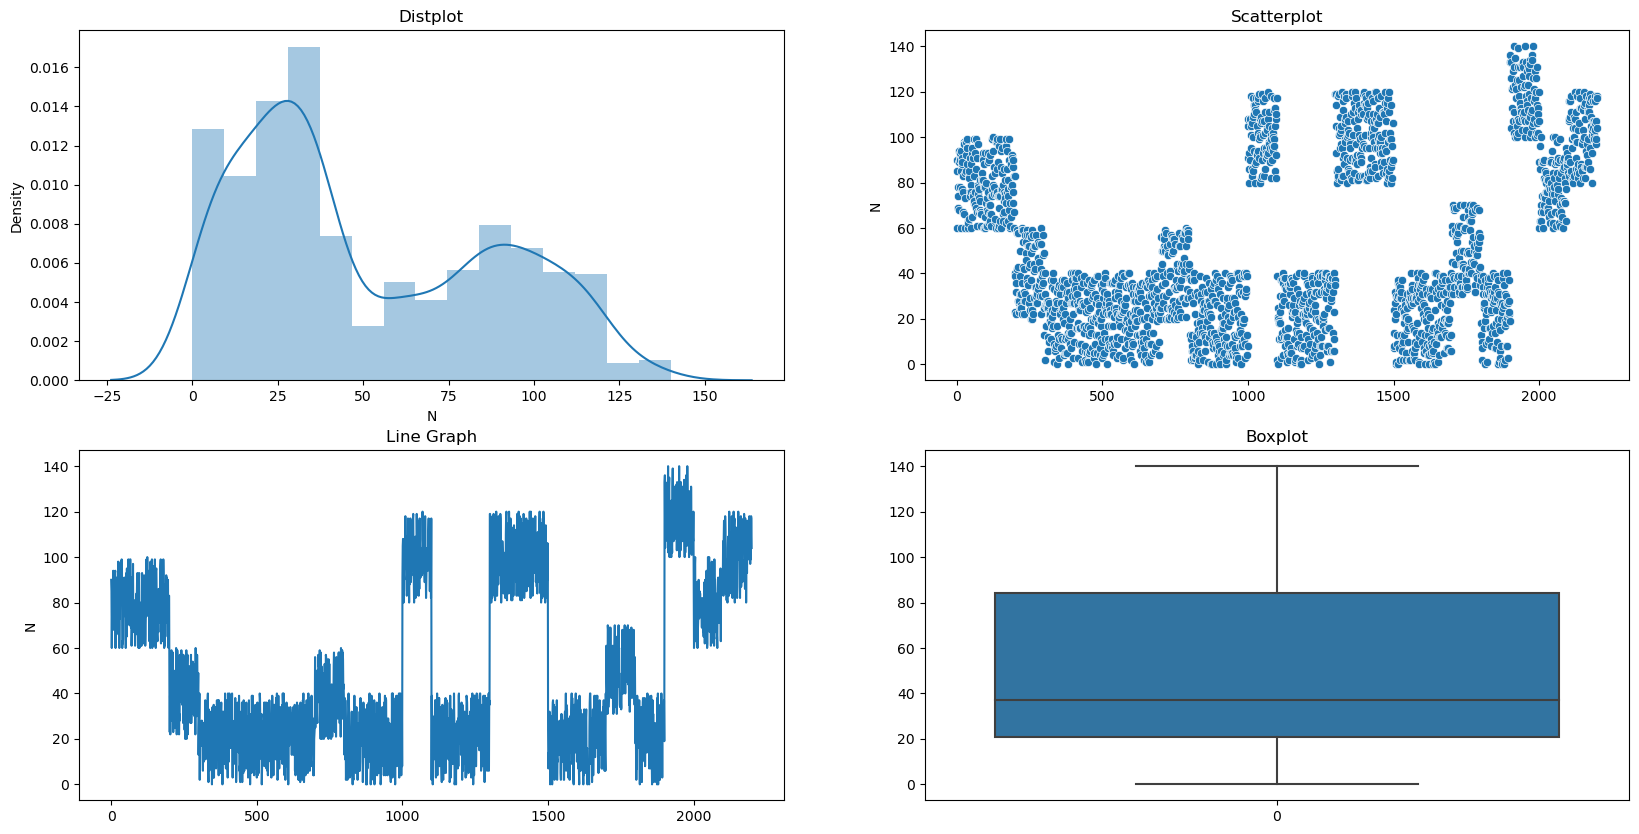

In [35]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.N)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.N )

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.N)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['N'])

plt.show()

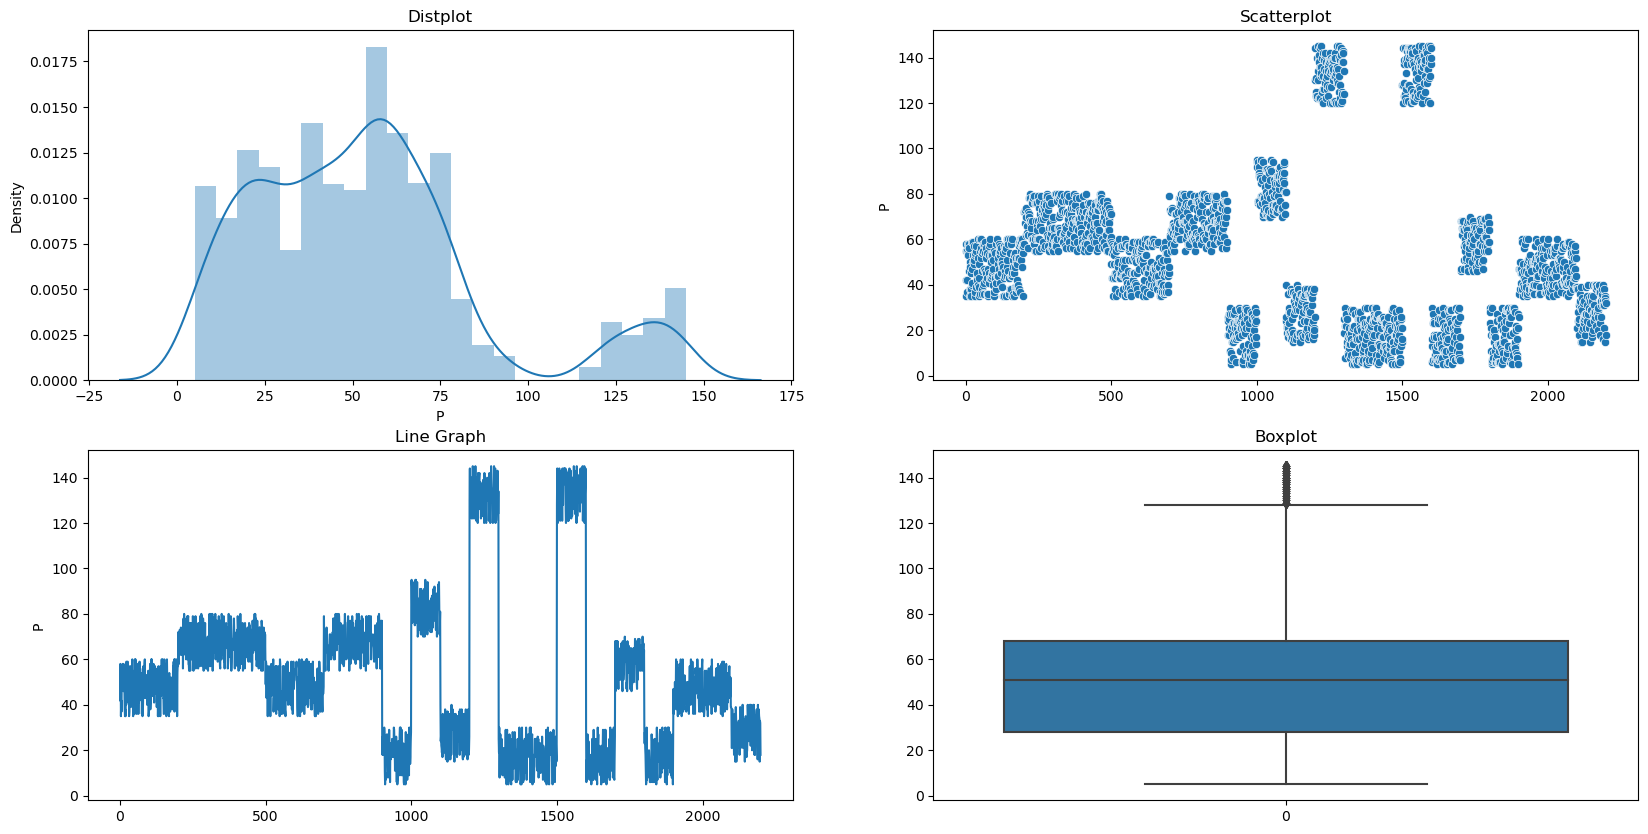

In [36]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.P)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.P)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.P)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['P'])

plt.show()

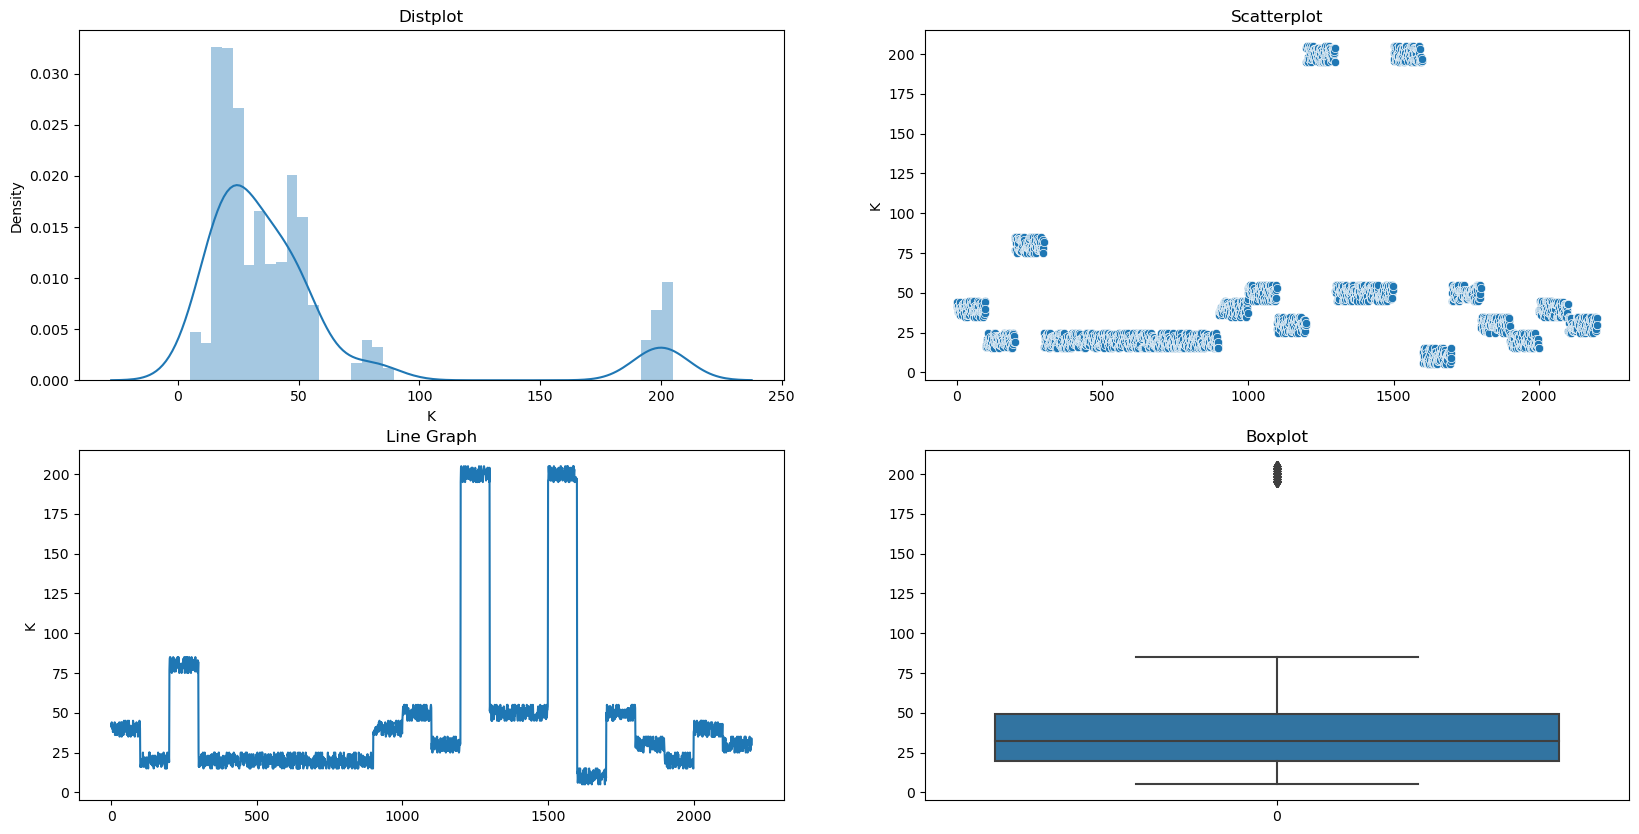

In [37]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.K)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.K)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.K)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['K'])

plt.show()

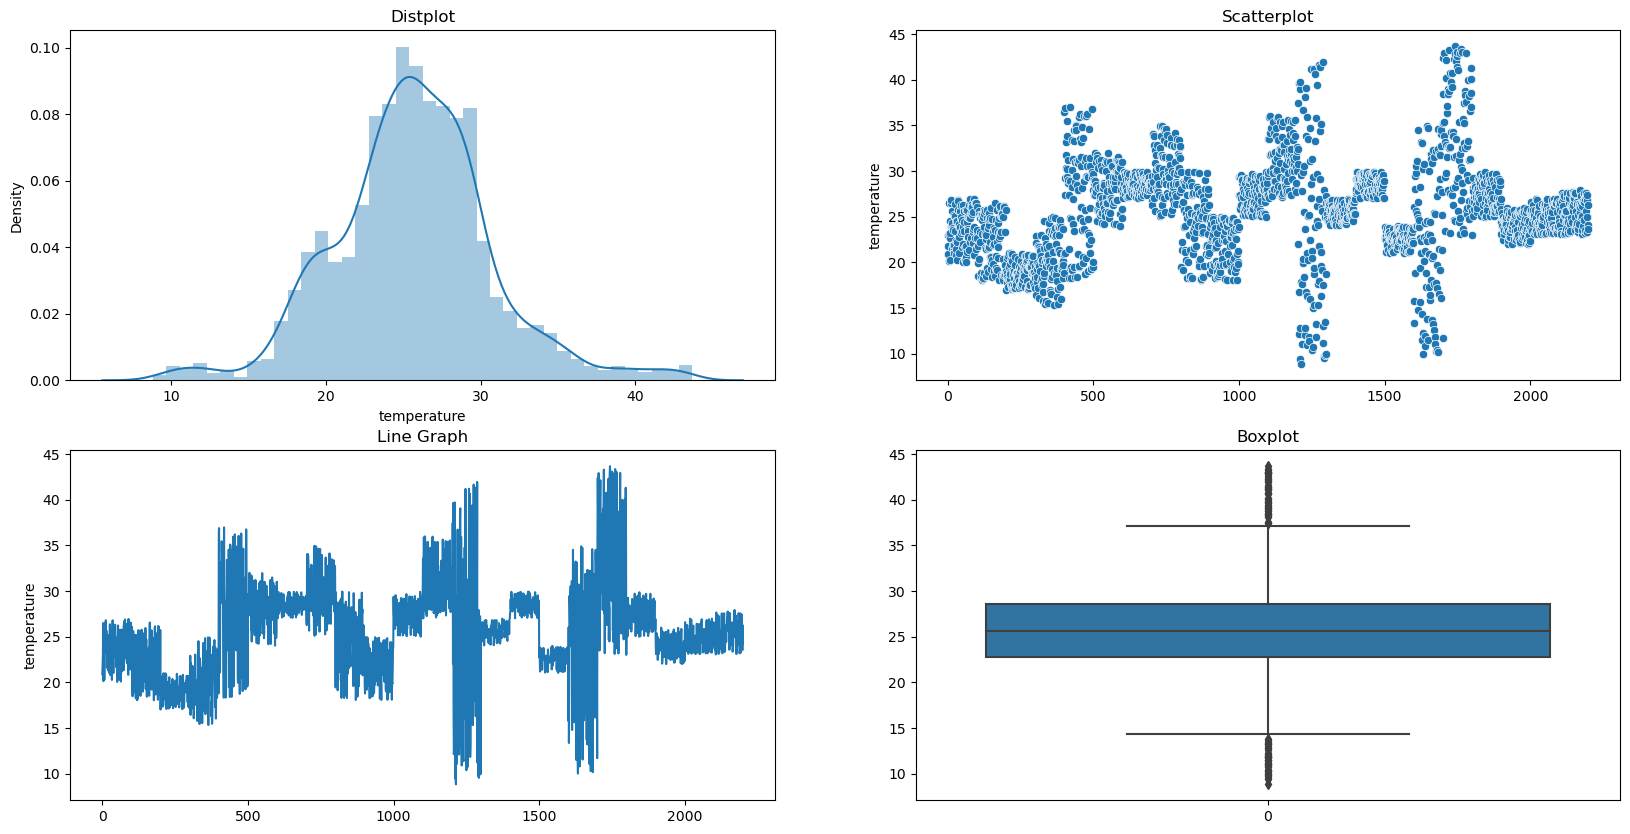

In [38]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.temperature)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.temperature)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.temperature)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['temperature'])

plt.show()

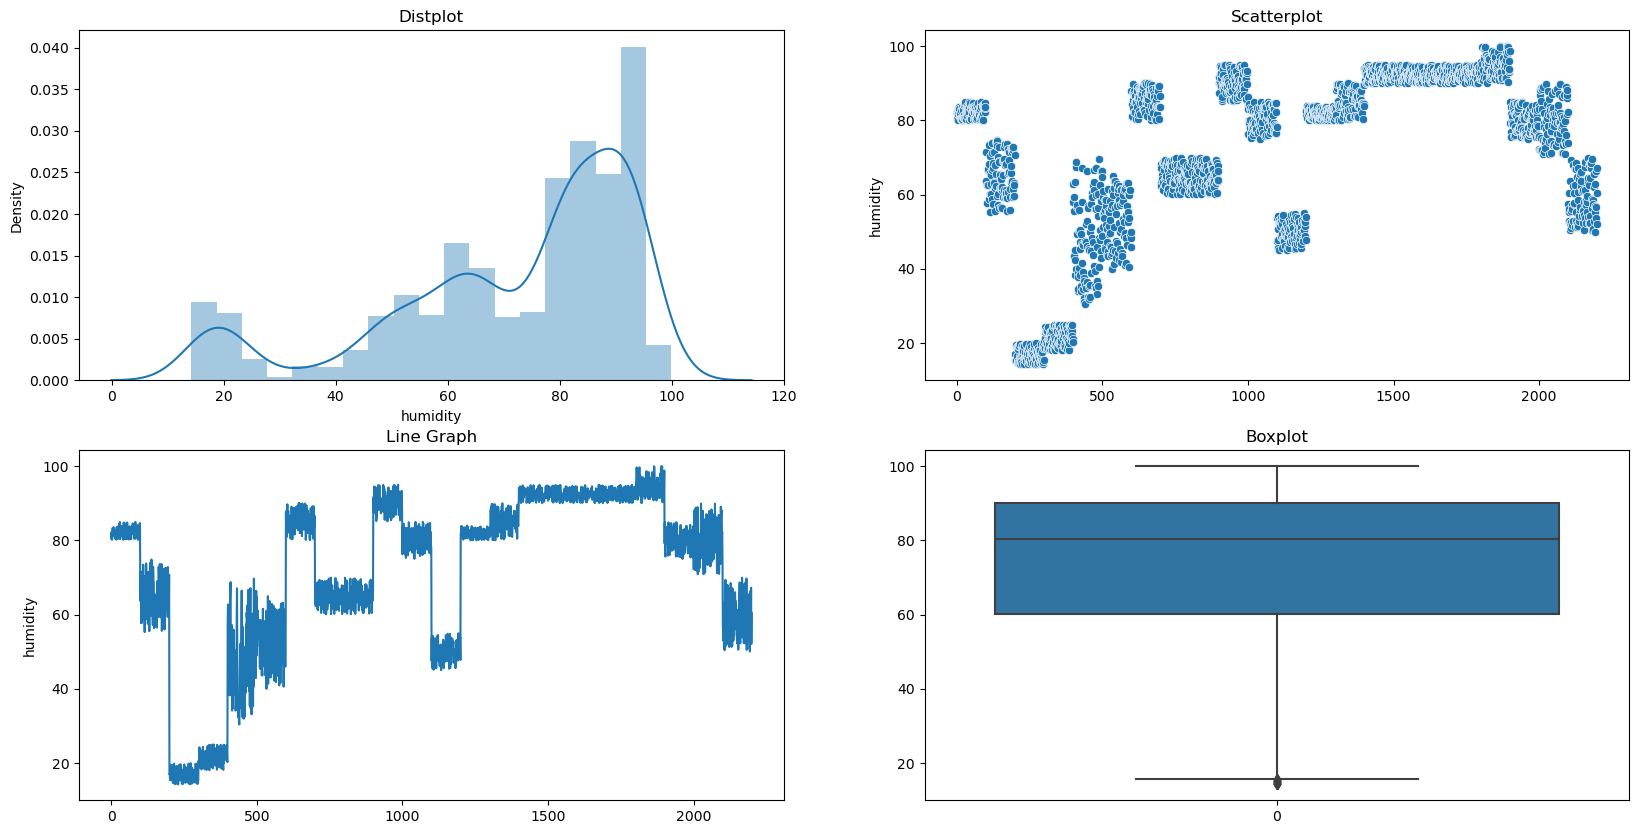

In [39]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.humidity)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.humidity)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.humidity)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['humidity'])

plt.show()

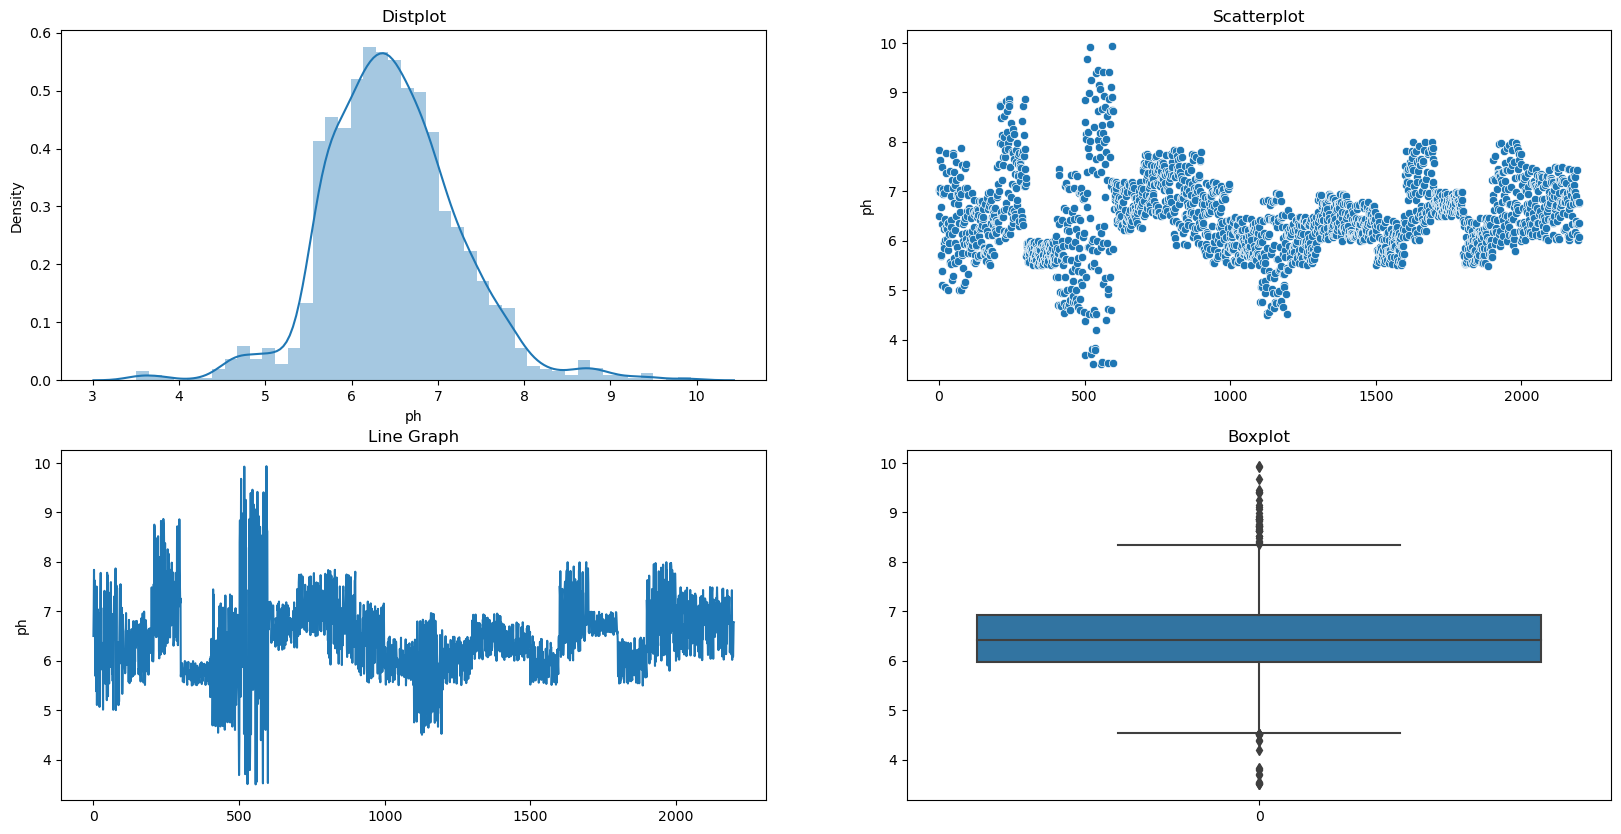

In [40]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.ph)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.ph)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.ph)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['ph'])

plt.show()

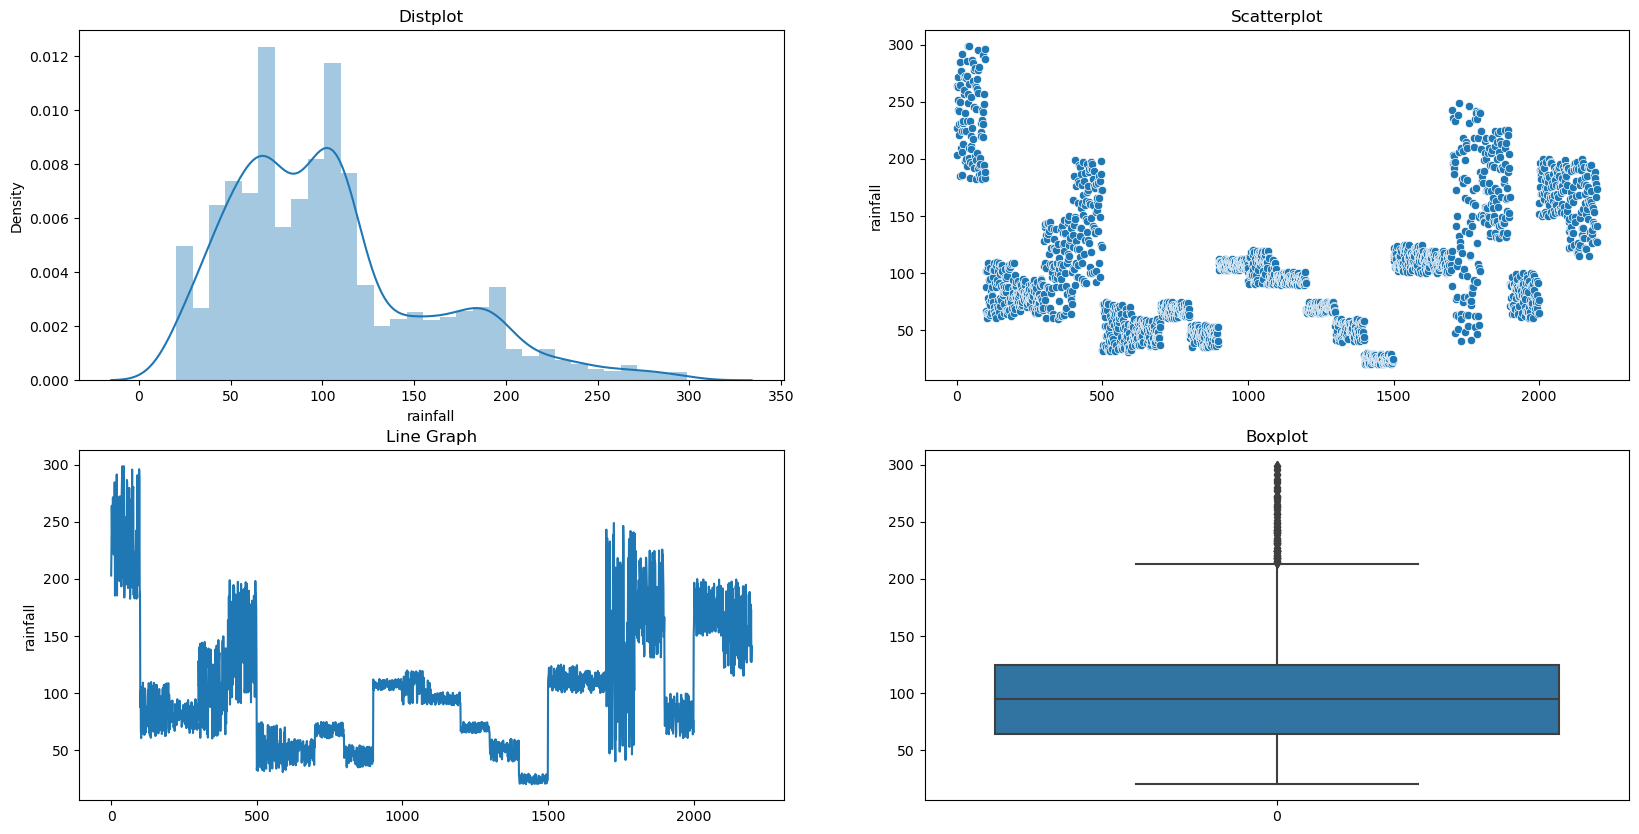

In [41]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.rainfall)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.rainfall)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.rainfall)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['rainfall'])

plt.show()

In [42]:
df1 = df.copy()
df1.drop('label',axis = 1,inplace = True)

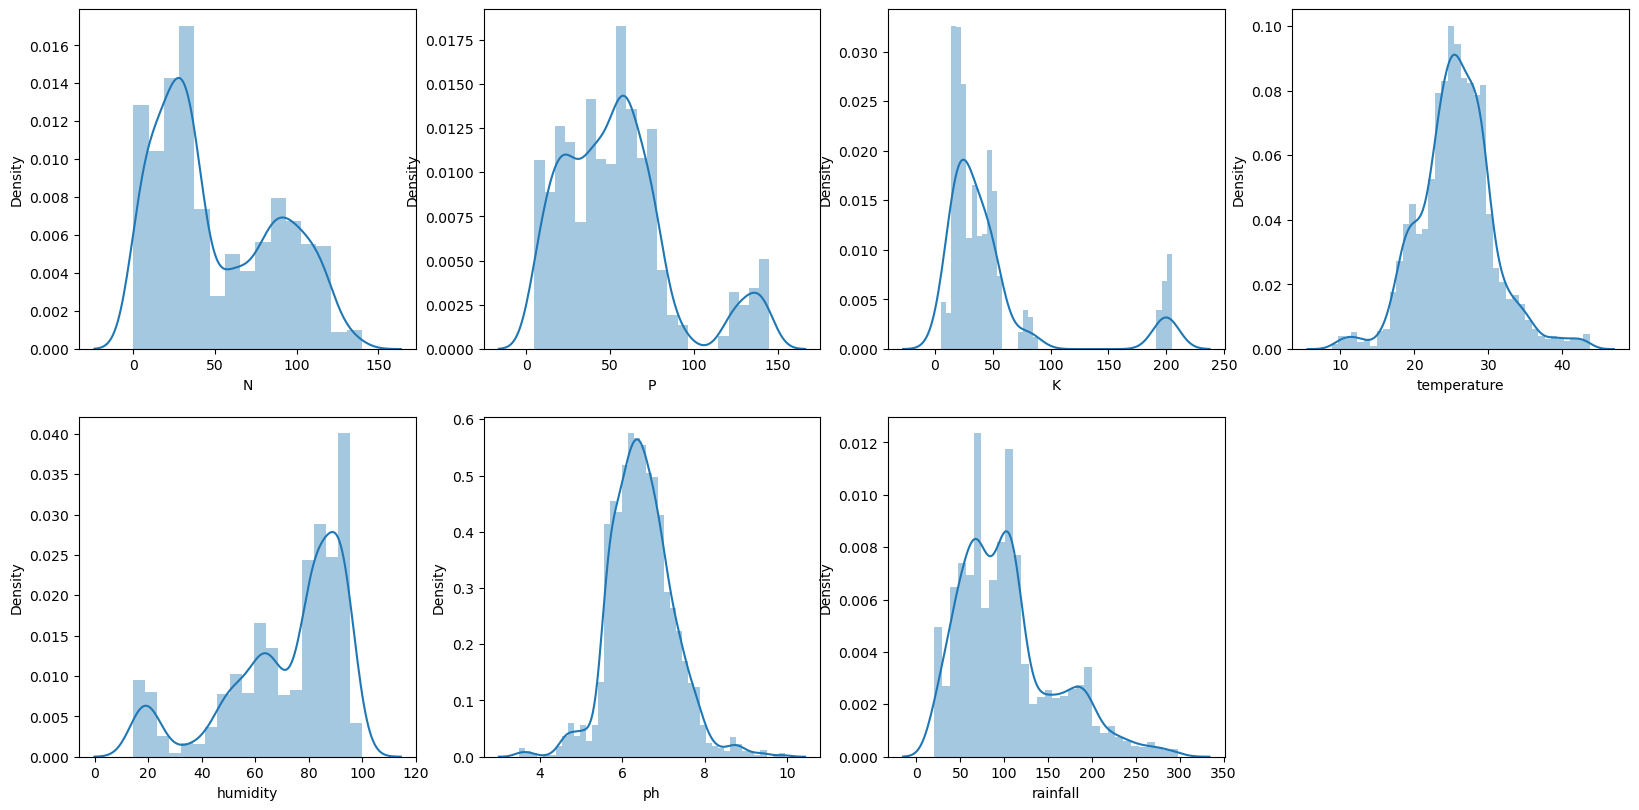

In [43]:
fig = plt.figure(figsize=(20,15))
for i,col in enumerate(df1.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(df1[col])

plt.show()    

### Categorizing the data to determine water scarcity 

In [44]:
categor_condn = [(df['rainfall'] <= 150),
                  (df['rainfall'] > 250)]

rating = ['low','high']
df['Water Usage'] = np.select(categor_condn,rating,default = 'medium')

df.head()

N   P   K  temperature   humidity        ph    rainfall label Water Usage
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice      medium
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice      medium
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        high
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice      medium
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        high

In [45]:
df['Water Usage'].value_counts()

low       1775
medium     387
high        38
Name: Water Usage, dtype: int64

<Axes: ylabel='Water Usage'>

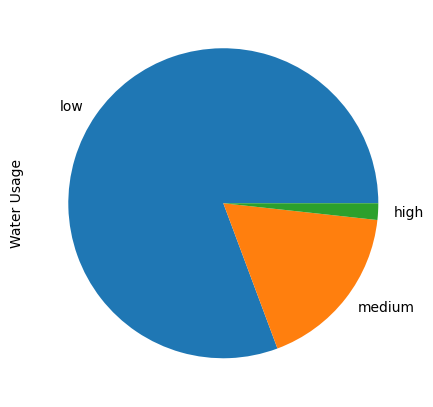

In [46]:
plt.figure(figsize = (5,8))
df['Water Usage'].value_counts().plot.pie()

<Axes: xlabel='Water Usage', ylabel='N'>

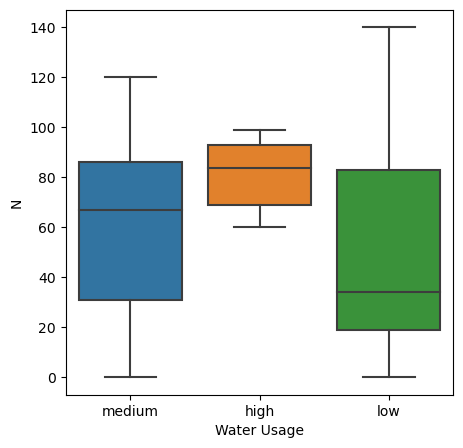

In [47]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'N')

<Axes: xlabel='Water Usage', ylabel='P'>

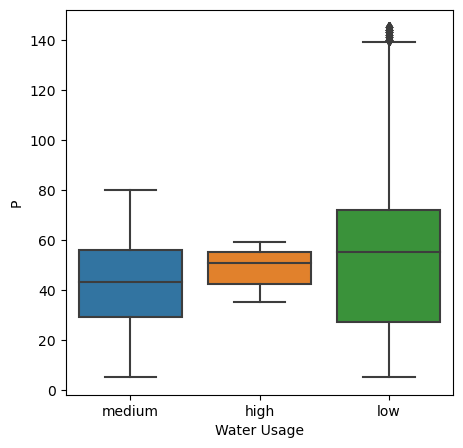

In [48]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'P')

<Axes: xlabel='Water Usage', ylabel='K'>

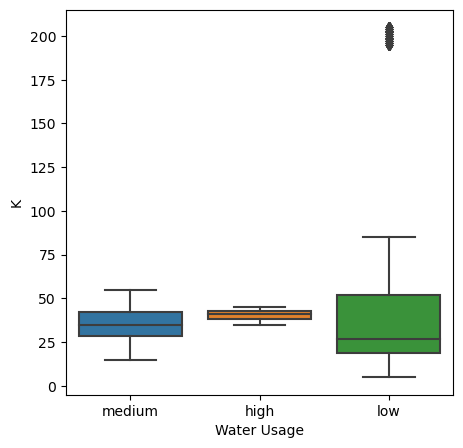

In [49]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'K')

<Axes: xlabel='Water Usage', ylabel='temperature'>

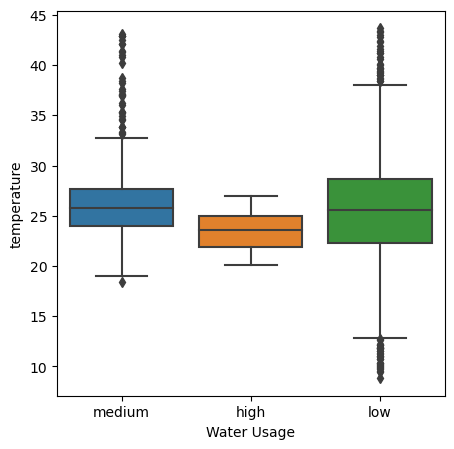

In [50]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'temperature')

<Axes: xlabel='Water Usage', ylabel='humidity'>

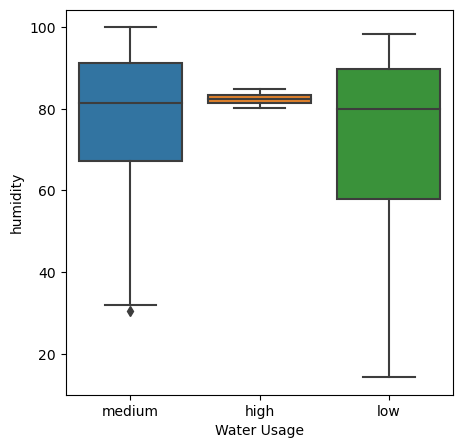

In [51]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'humidity')

<Axes: xlabel='Water Usage', ylabel='ph'>

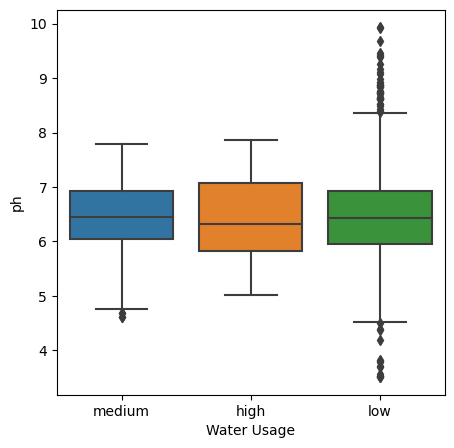

In [52]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'ph')

<Axes: xlabel='Water Usage', ylabel='rainfall'>

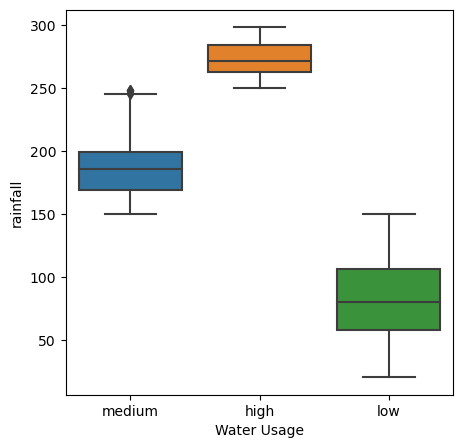

In [53]:
plt.figure(figsize = (5 , 5))
sns.boxplot(data = df , x = 'Water Usage' , y = 'rainfall')

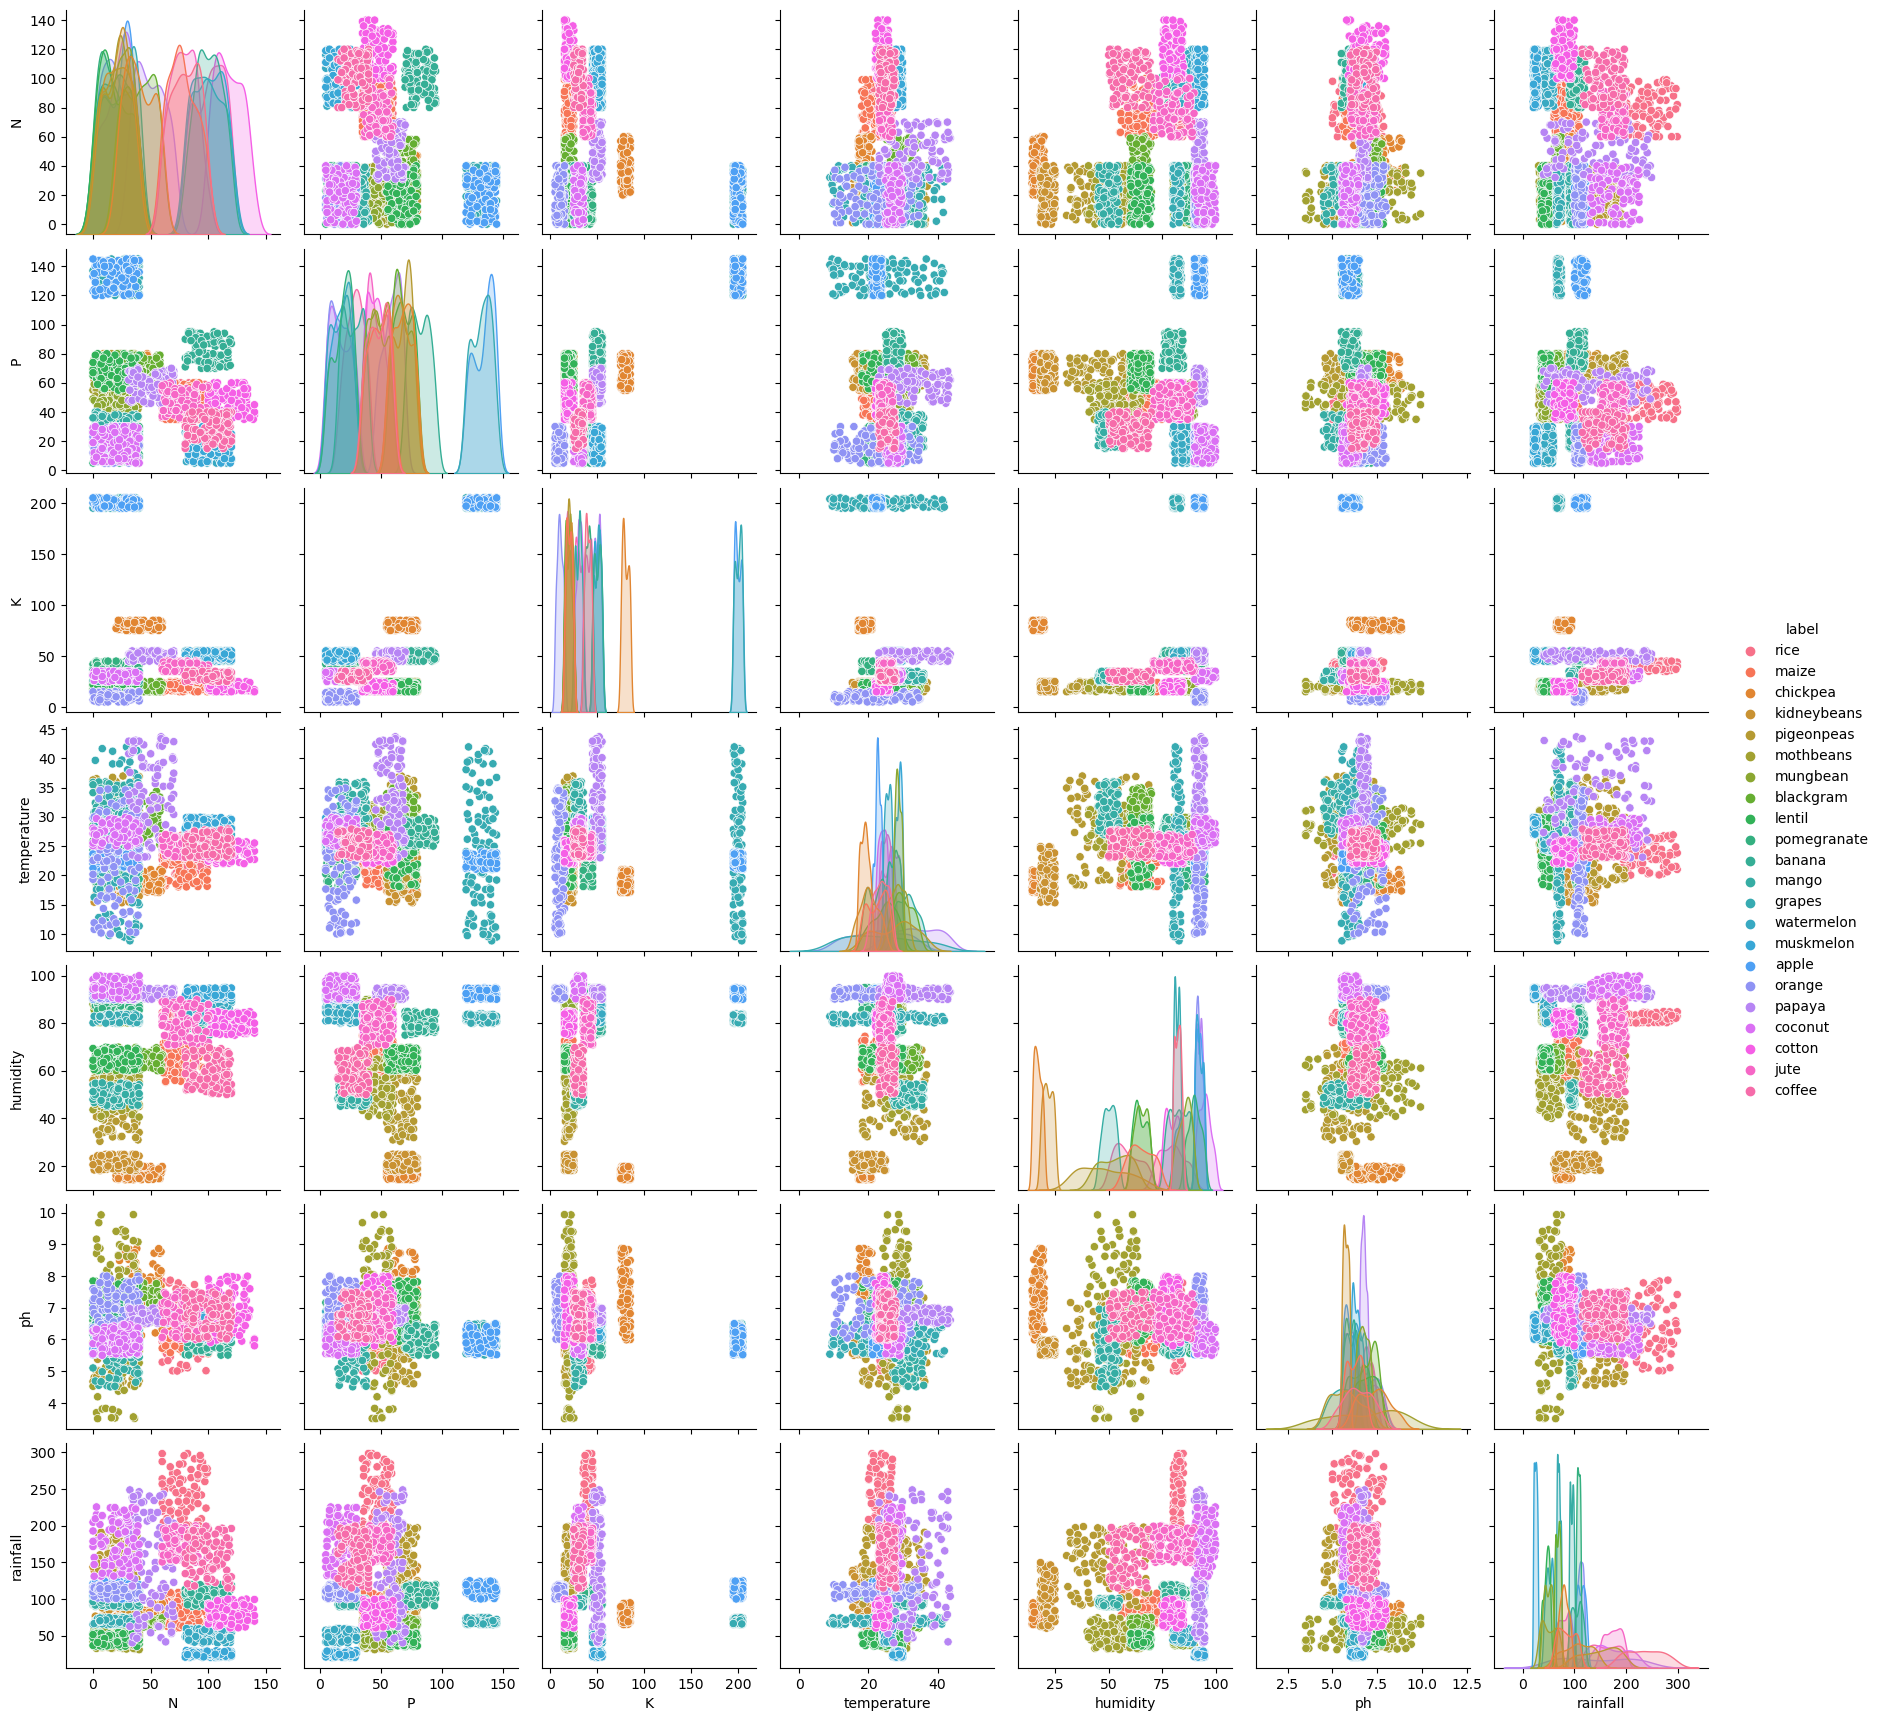

In [54]:
sns.pairplot(df,hue = 'label')

### Using Label Encoder function on column Water Usage

In [55]:
label_encoder = LabelEncoder()

In [56]:
df['Water Usage'] = label_encoder.fit_transform(df['Water Usage'])

In [57]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label  Water Usage
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice            2
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice            2
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice            0
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice            2
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice            0

### Splitting the dataframe into training and testing data

In [58]:
# Applying get dummies function on categorical column
x = df.drop('label',axis = 1)
y = df['label']

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.30 , random_state = 10)

In [60]:
print("Dimension of x_train :",x_train.shape)
print("Dimension of x_test :",x_test.shape)
print("Dimension of y_train :",y_train.shape)
print("Dimension of y_test :",y_test.shape)

Dimension of x_train : (1540, 8)
Dimension of x_test : (660, 8)
Dimension of y_train : (1540,)
Dimension of y_test : (660,)


## Machine Learning Algorithms

###  Logistic Regression

In [61]:
logmodel = lm()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [62]:
pred_log = logmodel.predict(x_test)

In [63]:
pred_log

array(['chickpea', 'coconut', 'cotton', 'coffee', 'pomegranate', 'lentil',
       'muskmelon', 'mango', 'coconut', 'mothbeans', 'maize', 'maize',
       'maize', 'blackgram', 'banana', 'cotton', 'chickpea', 'cotton',
       'papaya', 'cotton', 'blackgram', 'kidneybeans', 'mungbean',
       'cotton', 'kidneybeans', 'mango', 'pigeonpeas', 'orange', 'orange',
       'maize', 'maize', 'pomegranate', 'coffee', 'cotton', 'cotton',
       'mothbeans', 'watermelon', 'pigeonpeas', 'cotton', 'apple',
       'muskmelon', 'coffee', 'grapes', 'orange', 'kidneybeans',
       'pomegranate', 'grapes', 'banana', 'rice', 'rice', 'coconut',
       'rice', 'jute', 'coffee', 'blackgram', 'muskmelon', 'blackgram',
       'blackgram', 'rice', 'coconut', 'lentil', 'cotton', 'rice',
       'blackgram', 'coffee', 'muskmelon', 'chickpea', 'maize', 'mango',
       'watermelon', 'muskmelon', 'grapes', 'muskmelon', 'coffee',
       'muskmelon', 'mungbean', 'coconut', 'mungbean', 'orange', 'coffee',
       'coconut'

In [64]:
y_test.head(20)

299      chickpea
1859      coconut
1939       cotton
2194       coffee
1861      coconut
828        lentil
1409    muskmelon
1124        mango
1816      coconut
596     mothbeans
152         maize
163         maize
176         maize
729     blackgram
1056       banana
1927       cotton
282      chickpea
1965       cotton
1729       papaya
1967       cotton
Name: label, dtype: object

In [65]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        29
   blackgram       0.96      0.74      0.84        35
    chickpea       1.00      1.00      1.00        30
     coconut       0.97      0.97      0.97        33
      coffee       1.00      0.97      0.99        37
      cotton       0.92      0.97      0.95        36
      grapes       1.00      1.00      1.00        23
        jute       0.88      0.81      0.84        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.95      0.93      0.94        42
       maize       0.93      0.90      0.92        30
       mango       1.00      1.00      1.00        29
   mothbeans       0.76      0.97      0.85        29
    mungbean       0.96      1.00      0.98        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [66]:
print(confusion_matrix(y_test,pred_log))

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  2  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 39  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 28  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [67]:
accuracy_score(y_test,pred_log)

0.9590909090909091

###  Random Forest 

In [68]:
rfc = RandomForestClassifier(n_estimators = 500,criterion = "entropy")

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [70]:
predict_r = rfc.predict(x_test)

In [71]:
predict_r

array(['chickpea', 'coconut', 'cotton', 'coffee', 'coconut', 'lentil',
       'muskmelon', 'mango', 'coconut', 'mothbeans', 'maize', 'maize',
       'maize', 'blackgram', 'banana', 'cotton', 'chickpea', 'cotton',
       'papaya', 'cotton', 'blackgram', 'kidneybeans', 'mungbean',
       'cotton', 'kidneybeans', 'mango', 'pigeonpeas', 'orange', 'orange',
       'maize', 'maize', 'pomegranate', 'coffee', 'maize', 'cotton',
       'mothbeans', 'watermelon', 'pigeonpeas', 'cotton', 'apple',
       'muskmelon', 'coffee', 'grapes', 'orange', 'kidneybeans',
       'pomegranate', 'grapes', 'banana', 'rice', 'rice', 'coconut',
       'rice', 'jute', 'coffee', 'blackgram', 'muskmelon', 'blackgram',
       'blackgram', 'rice', 'coconut', 'lentil', 'cotton', 'rice',
       'blackgram', 'coffee', 'muskmelon', 'chickpea', 'maize', 'mango',
       'watermelon', 'muskmelon', 'grapes', 'muskmelon', 'coffee',
       'muskmelon', 'mungbean', 'coconut', 'mungbean', 'orange', 'coffee',
       'coconut', 'gr

In [72]:
accuracy_score(y_test,predict_r)

0.996969696969697

In [73]:
print(confusion_matrix(y_test,predict_r))

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 42  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [74]:
import pickle
pickle.dump(rfc , open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))